# Importing and preparing data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers
import keras
 
%matplotlib inline
tf.random.set_seed(42)

In [2]:
df = pd.read_csv('../input/mobile-health/mhealth_raw_data.csv')
df

alx     aly      alz       glx      gly      glz     arx     ary  \
0        2.1849 -9.6967  0.63077  0.103900 -0.84053 -0.68762 -8.6499 -4.5781   
1        2.3876 -9.5080  0.68389  0.085343 -0.83865 -0.68369 -8.6275 -4.3198   
2        2.4086 -9.5674  0.68113  0.085343 -0.83865 -0.68369 -8.5055 -4.2772   
3        2.1814 -9.4301  0.55031  0.085343 -0.83865 -0.68369 -8.6279 -4.3163   
4        2.4173 -9.3889  0.71098  0.085343 -0.83865 -0.68369 -8.7008 -4.1459   
...         ...     ...      ...       ...      ...      ...     ...     ...   
1215740  1.7849 -9.8287  0.29725 -0.341370 -0.90056 -0.61493 -3.7198 -8.9071   
1215741  1.8687 -9.8766  0.46236 -0.341370 -0.90056 -0.61493 -3.7160 -8.7455   
1215742  1.6928 -9.9290  0.16631 -0.341370 -0.90056 -0.61493 -3.8824 -9.1155   
1215743  1.5279 -9.6306  0.30458 -0.341370 -0.90056 -0.61493 -3.5564 -9.1441   
1215744  1.6614 -9.8398  0.18088 -0.332100 -0.90432 -0.61886 -3.9035 -8.9324   

              arz       grx      gry       grz  Activity    subject  
0        0.187760 -0.449020 -1.01030  0.034483         0   subject1  
1        0.023595 -0.449020 -1.01030  0.034483         0   subject1  
2        0.275720 -0.449020 -1.01030  0.034483         0   subject1  
3        0.367520 -0.456860 -1.00820  0.025862         0   subject1  
4        0.407290 -0.456860 -1.00820  0.025862         0   subject1  
...           ...       ...      ...       ...       ...        ...  
1215740  0.294230  0.041176 -0.99384 -0.480600         0  subject10  
1215741  0.448140  0.041176 -0.99384 -0.480600         0  subject10  
1215742  0.450480  0.041176 -0.99384 -0.480600         0  subject10  
1215743  0.594880  0.041176 -0.99384 -0.480600         0  subject10  
1215744  0.761710  0.035294 -1.02050 -0.471980         0  subject10  

[1215745 rows x 14 columns]

In [3]:
from sklearn.utils import resample
 
df_majority = df[df.Activity==0]
df_minorities = df[df.Activity!=0]
 
df_majority_downsampled = resample(df_majority,n_samples=30000, random_state=42)
df = pd.concat([df_majority_downsampled, df_minorities])
df.Activity.value_counts()

Activity
1     30720
3     30720
2     30720
4     30720
9     30720
11    30720
5     30720
10    30720
0     30000
7     29441
8     29337
6     28315
12    10342
Name: count, dtype: int64

In [4]:
#Dropping feature have data outside 98% confidence interval
df1 = df.copy()
for feature in df1.columns[:-2]:
  lower_range = np.quantile(df[feature],0.01)
  upper_range = np.quantile(df[feature],0.99)
  print(feature,'range:',lower_range,'to',upper_range)

  df1 = df1.drop(df1[(df1[feature]>upper_range) | (df1[feature]<lower_range)].index, axis=0)
  print('shape',df1.shape)

alx range: -11.47312 to 19.233
shape (365733, 14)
aly range: -19.379 to 2.447871999999997
shape (360018, 14)
alz range: -18.95 to 14.19623999999999
shape (356270, 14)
glx range: -0.74212 to 0.80705
shape (349377, 14)
gly range: -1.0694 to 0.96623
shape (342841, 14)
glz range: -1.1061 to 0.8290799999999999
shape (337391, 14)
arx range: -21.492 to 9.097647999999998
shape (332307, 14)
ary range: -18.694000000000003 to 11.948059999999998
shape (326241, 14)
arz range: -10.367 to 11.823119999999996
shape (323674, 14)
grx range: -1.0196 to 0.95686
shape (320188, 14)
gry range: -1.1417 to 0.90965
shape (315352, 14)
grz range: -0.69828 to 1.125
shape (310929, 14)


In [5]:
label_map = {
    0: 'Nothing',
    1: 'Standing still',  
    2: 'Sitting and relaxing', 
    3: 'Lying down',  
    4: 'Walking',  
    5: 'Climbing stairs',  
    6: 'Waist bends forward',
    7: 'Frontal elevation of arms', 
    8: 'Knees bending (crouching)', 
    9: 'Cycling', 
    10: 'Jogging', 
    11: 'Running', 
    12: 'Jump front & back' 
}

In [6]:
#Defining functions to visualize comparisons.
def plot_comparison(data, metric = 'acceleration'):
 
  metric = metric[0].lower()
  data = data
 
  for i in range(0,13):
    plt.figure(figsize=(16,4))
 
    plt.subplot(1,2,1)
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'lx'], alpha=.7, label=metric+'lx')
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'ly'],color='red', alpha=.7, label=metric+'ly')
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'lz'],color='green', alpha=.7, label=metric+'lz')
    plt.title(f'{label_map[i]} - left-ankle')
    plt.legend()  
 
    plt.subplot(1,2,2)
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'rx'], alpha=.7, label=metric+'rx')
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'ry'],color='blue', alpha=.7, label=metric+'ry')
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'rz'],color='green', alpha=.7, label=metric+'rz')
    plt.title(f'{label_map[i]} - right-lower-arm')
    plt.legend() 
 
    plt.show()
    print()
 
def plot_category(data,cat):
  array = (data[cat].value_counts().sort_values(ascending=False)/len(data))*100
  plt.barh(array.index, width = array.values)
  for index, value in enumerate(array.values):
      plt.text(value + .5 , index, s= '{:.1f}%'.format(value))
  plt.show()

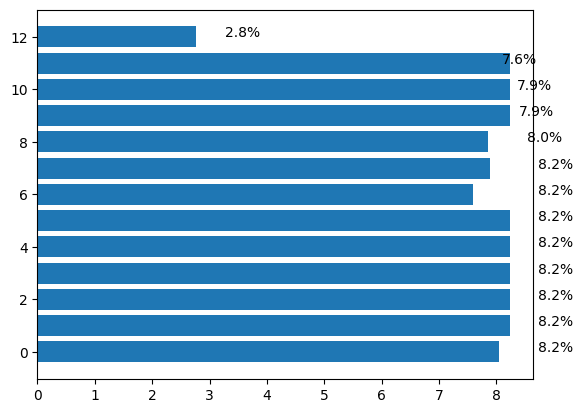

In [7]:
plot_category(df,'Activity')
plt.show()

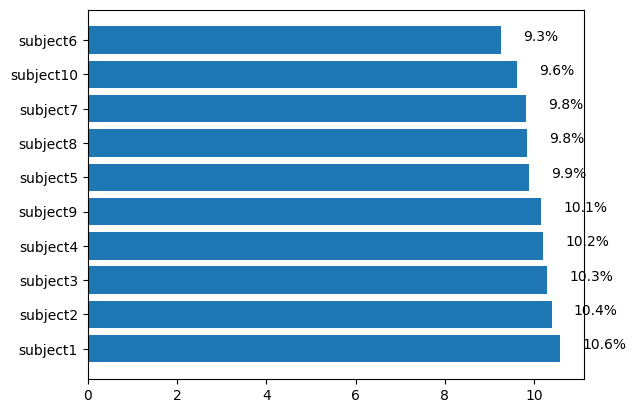

In [8]:
plot_category(df,'subject')

In [9]:
subject1 = df[df['subject']=='subject1']
subject1.Activity.value_counts()

Activity
0     4310
8     3379
1     3072
3     3072
2     3072
4     3072
6     3072
7     3072
9     3072
10    3072
11    3072
5     3072
12    1075
Name: count, dtype: int64

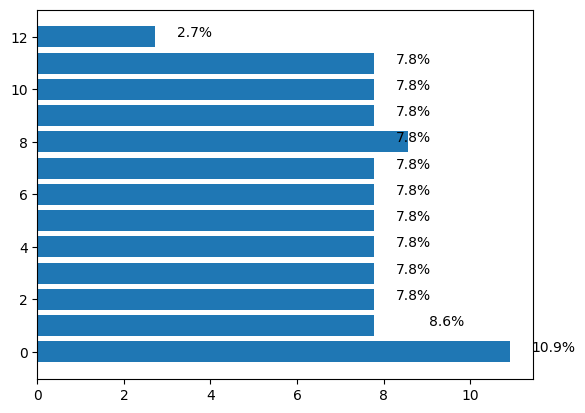

In [10]:
plot_category(subject1,'Activity')

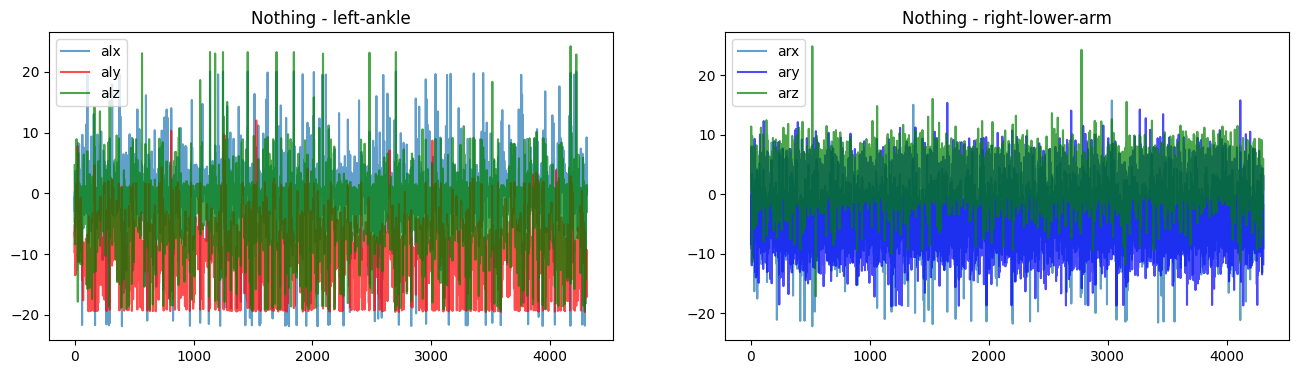

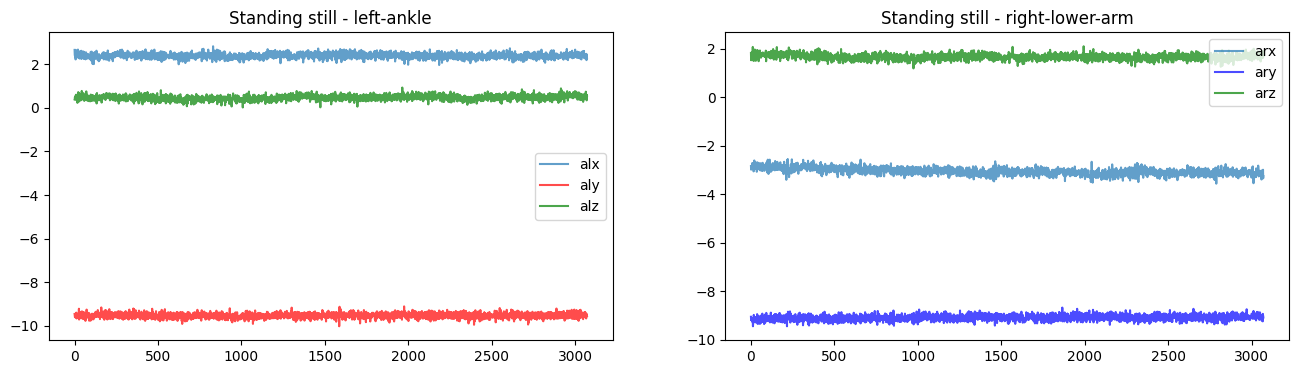

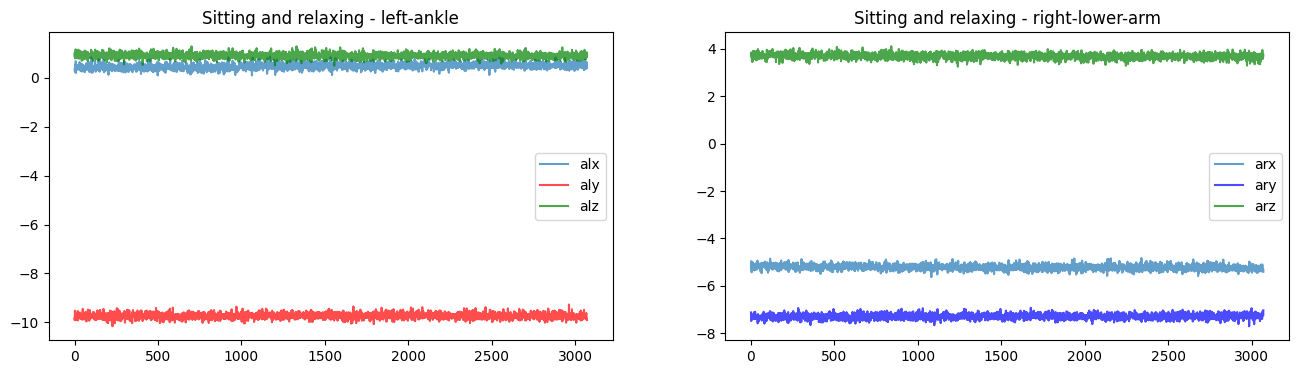

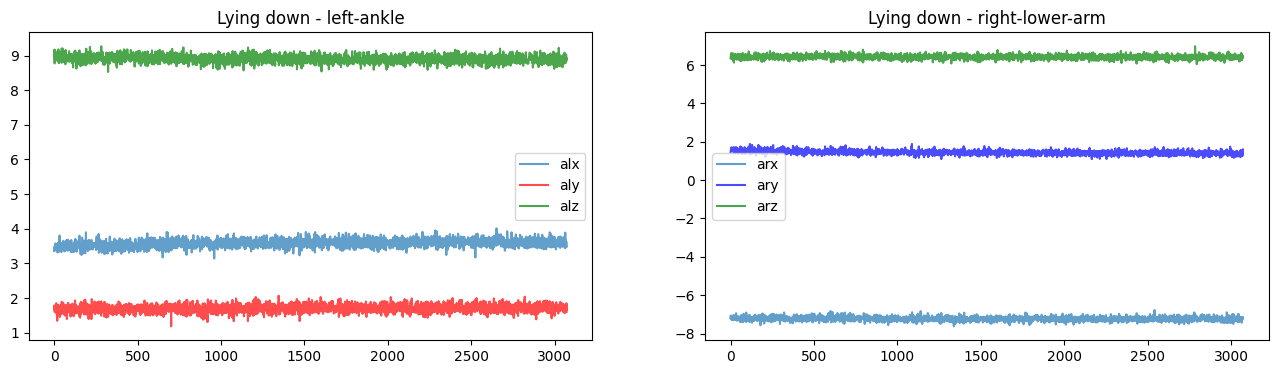

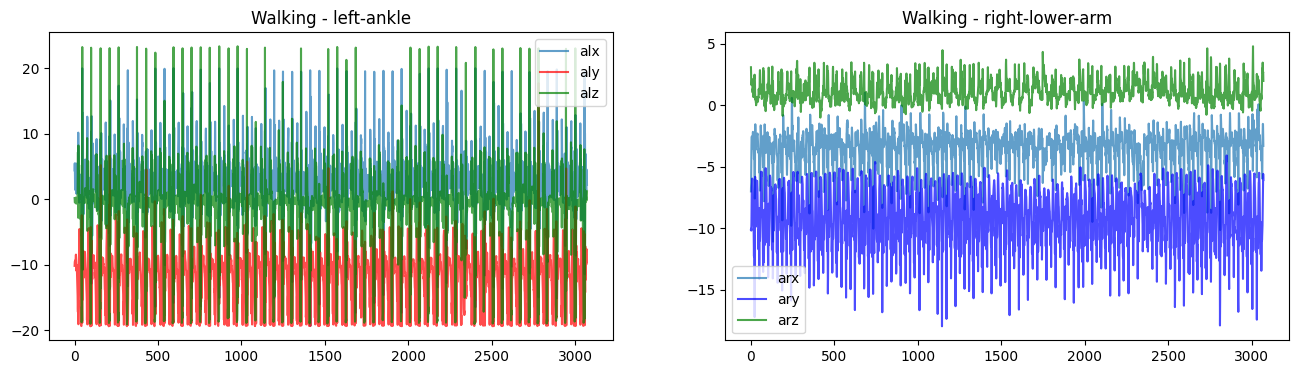

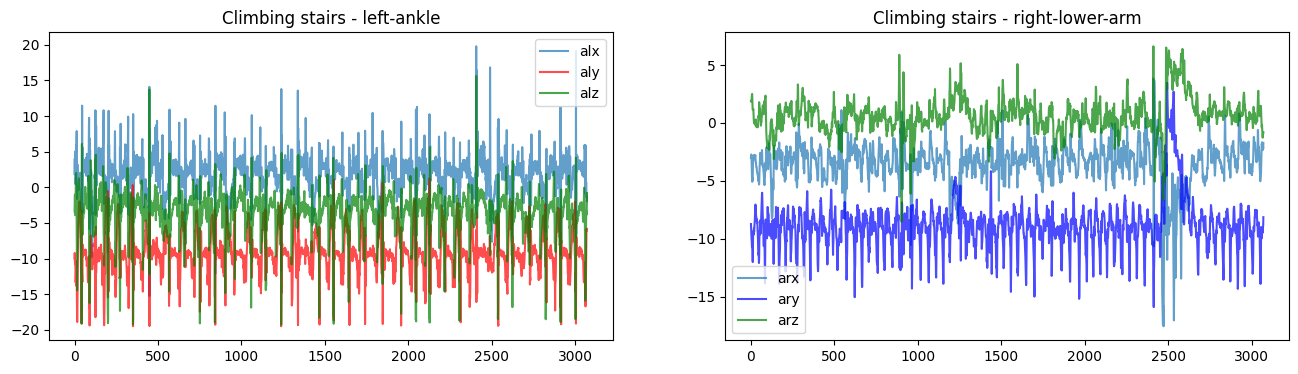

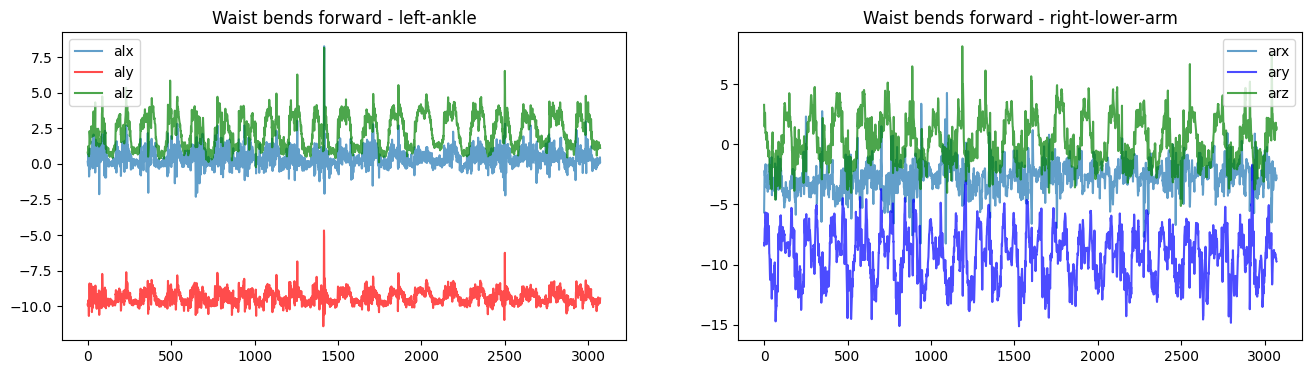

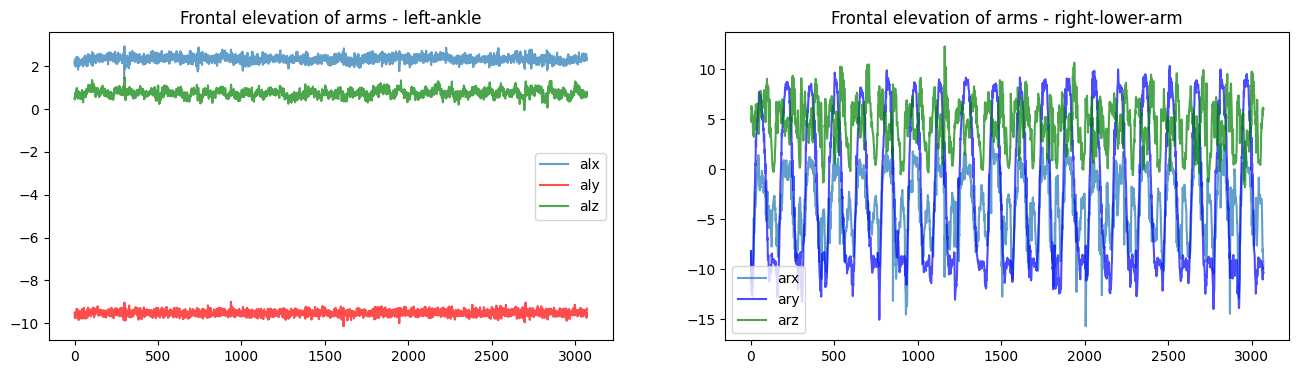

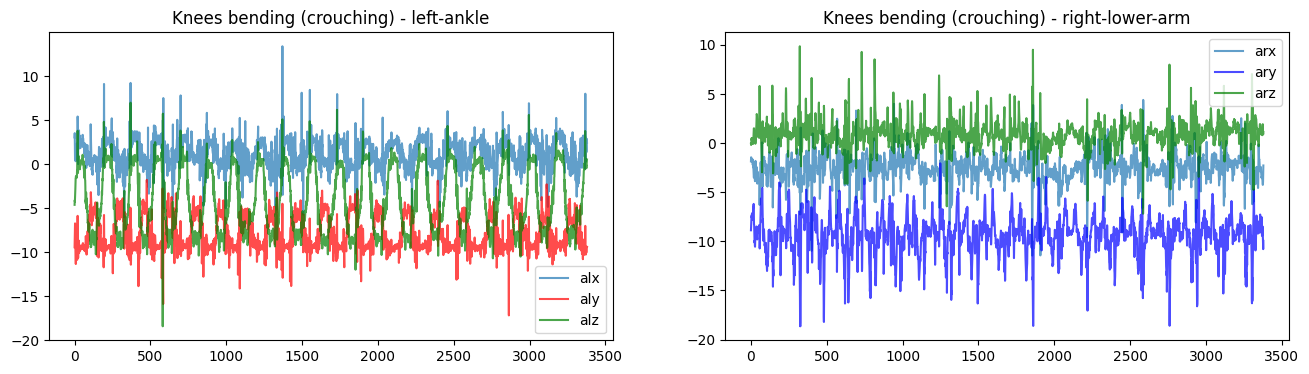

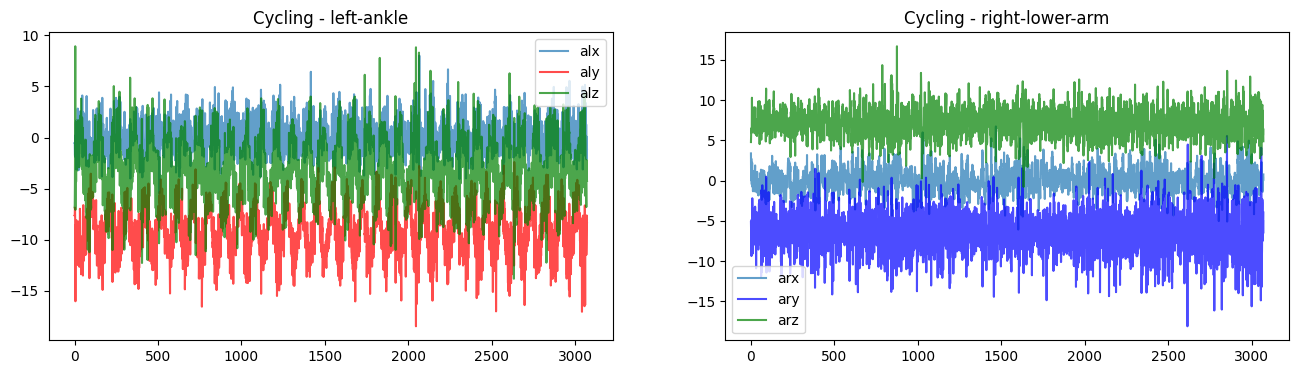

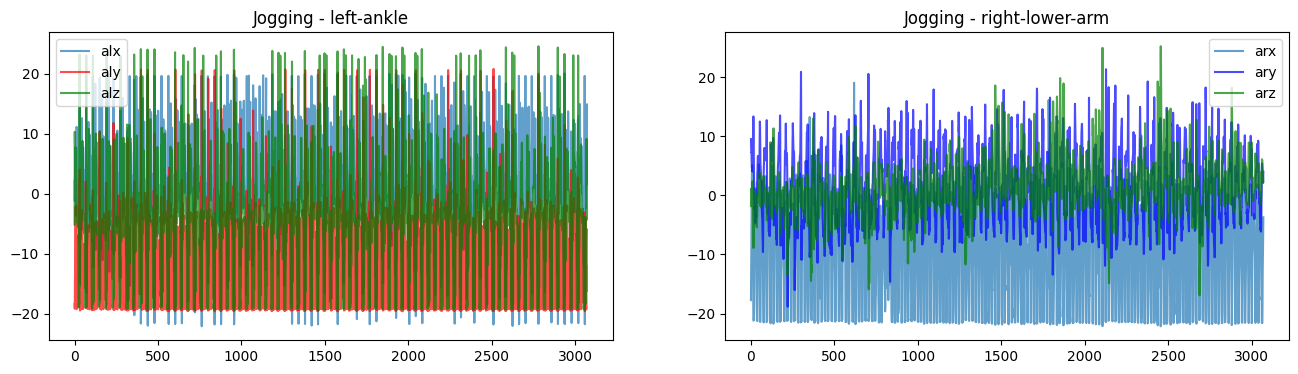

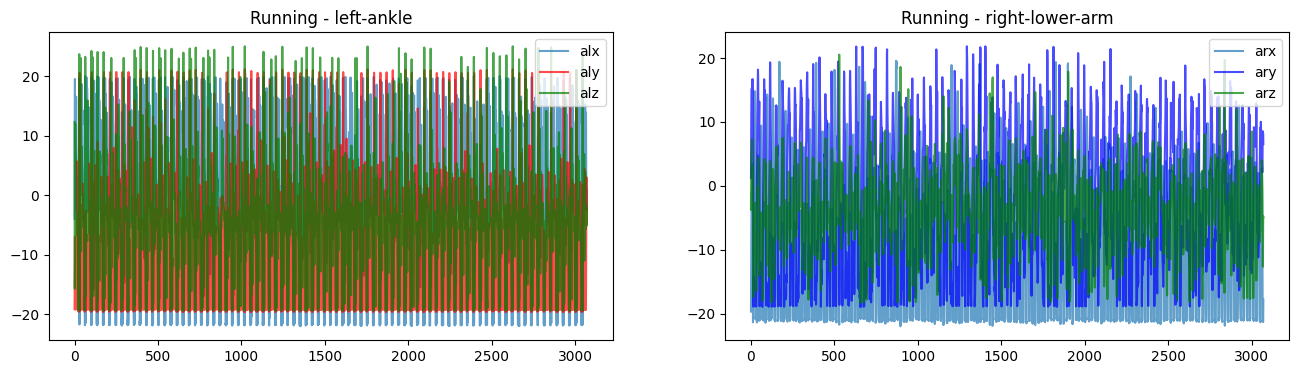

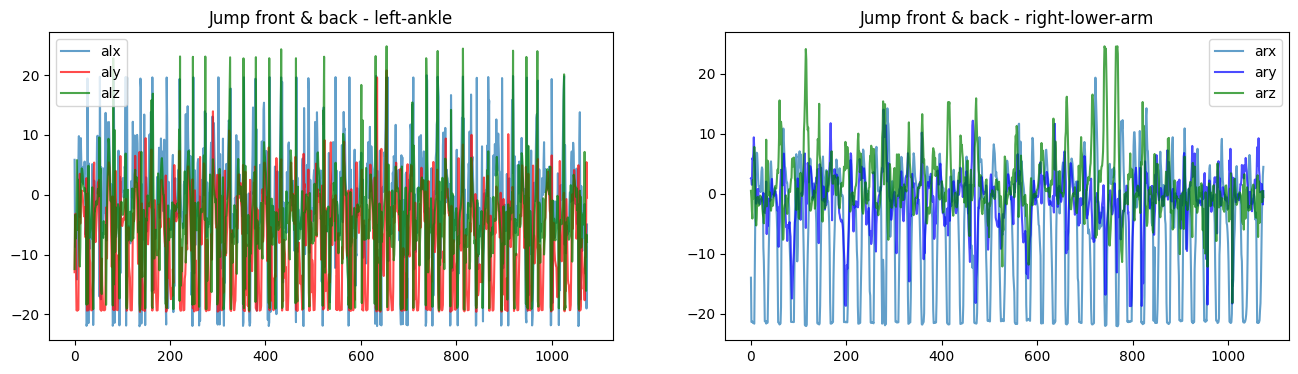

In [11]:
plot_comparison(subject1,'acceleration')

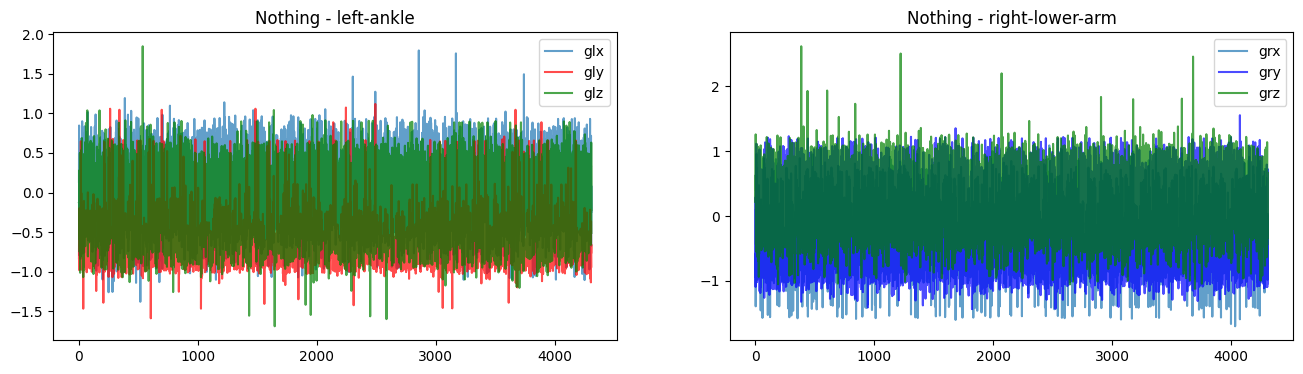

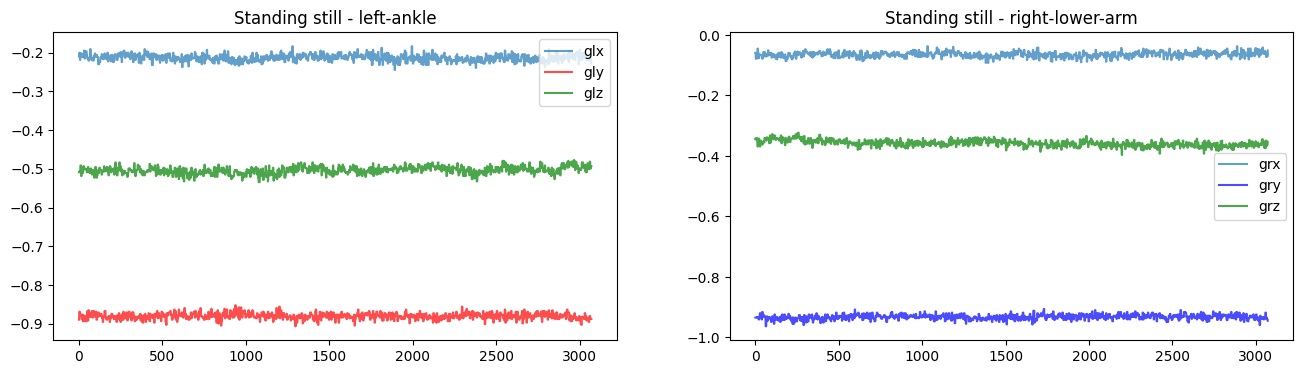

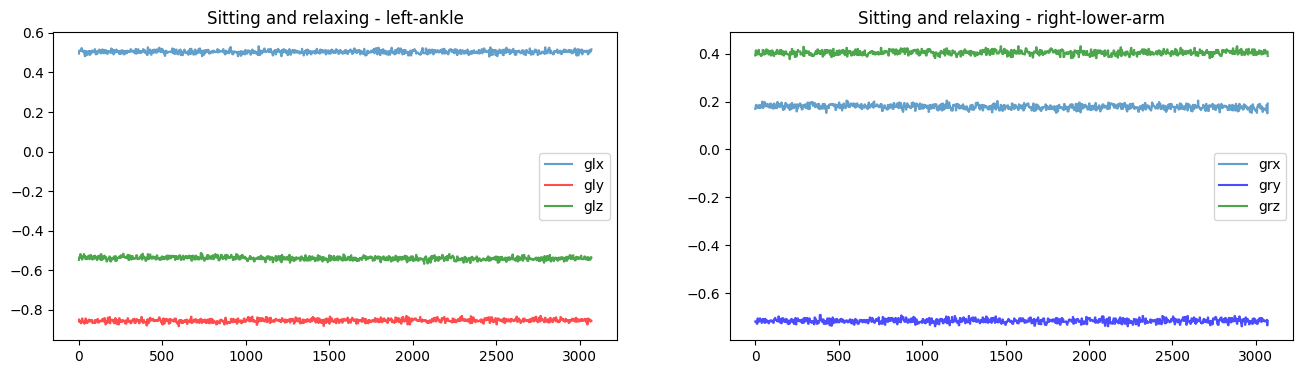

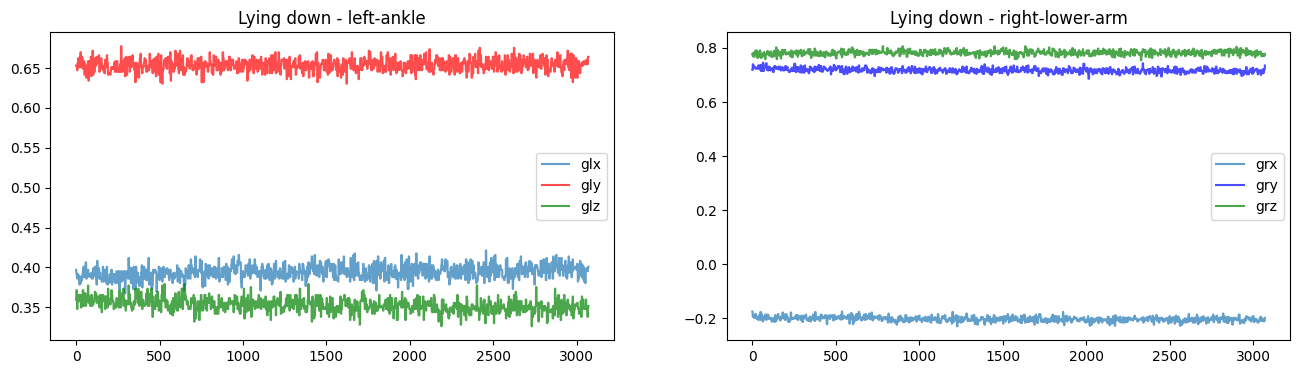

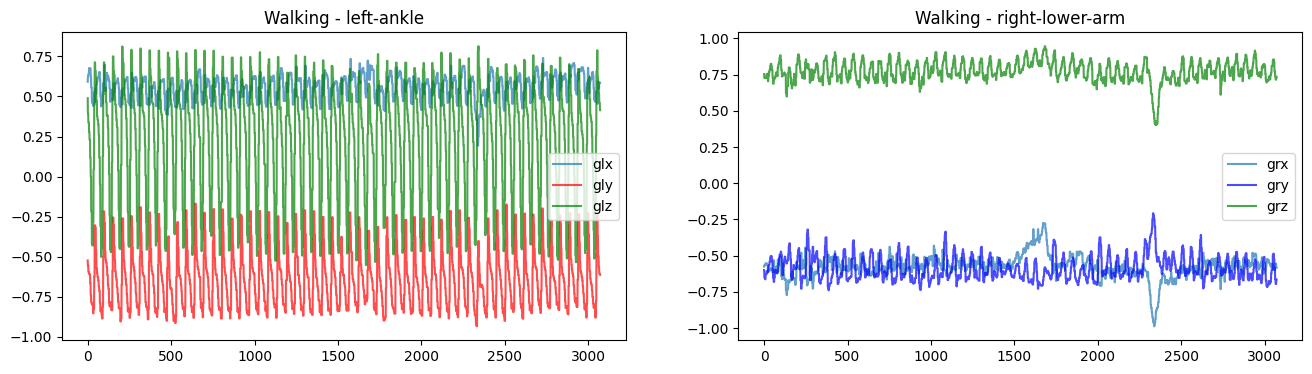

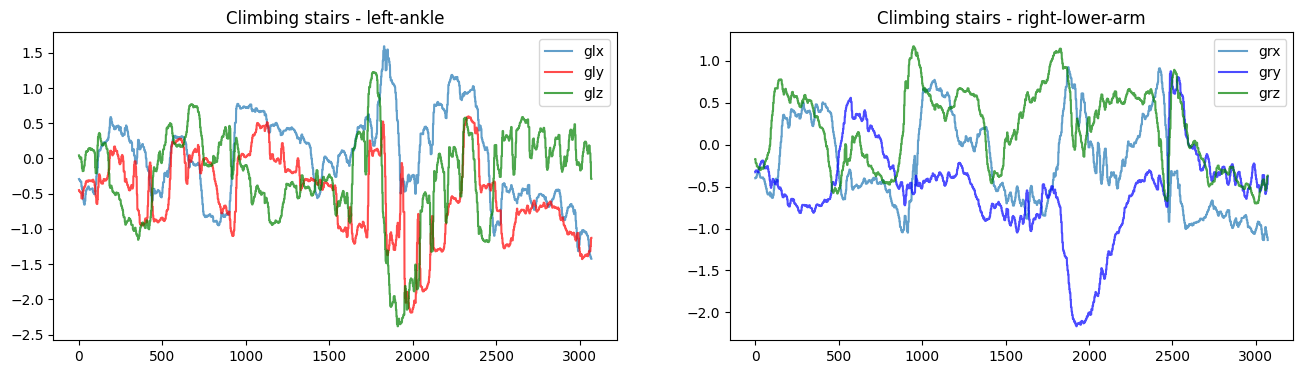

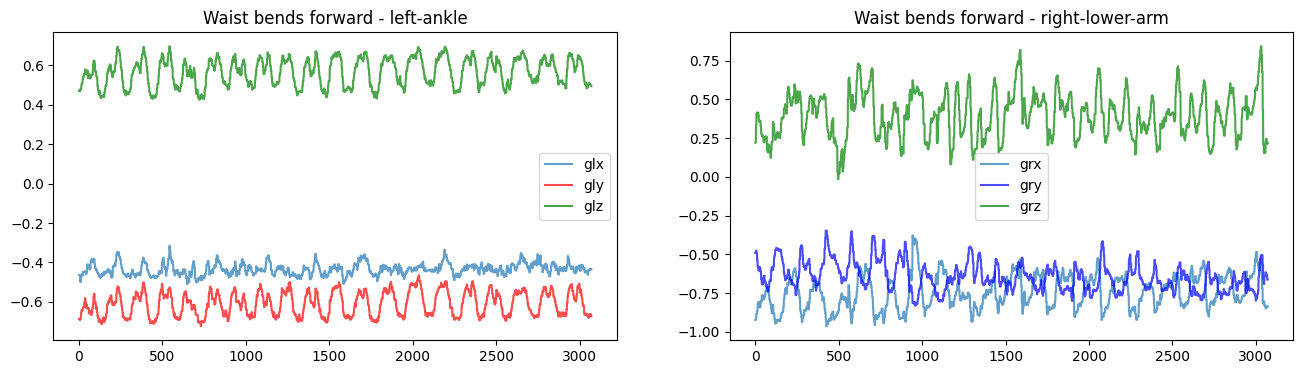

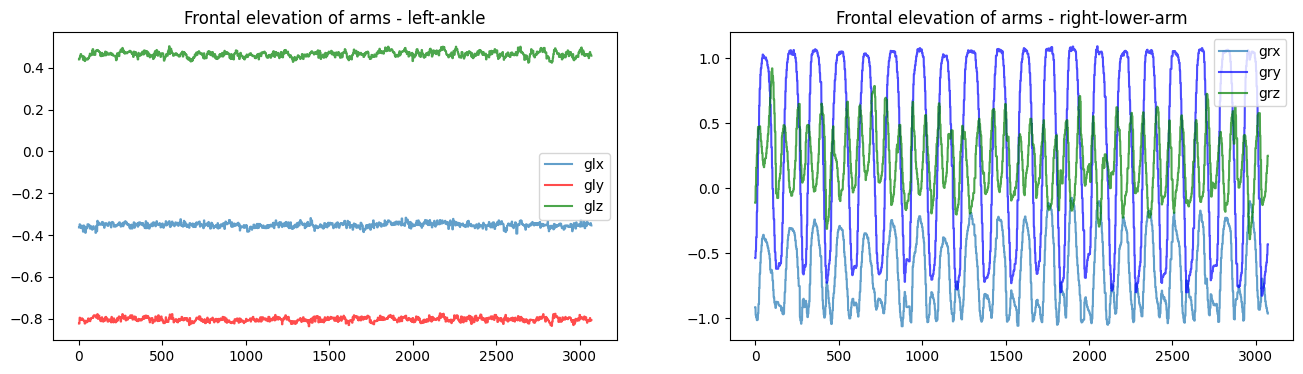

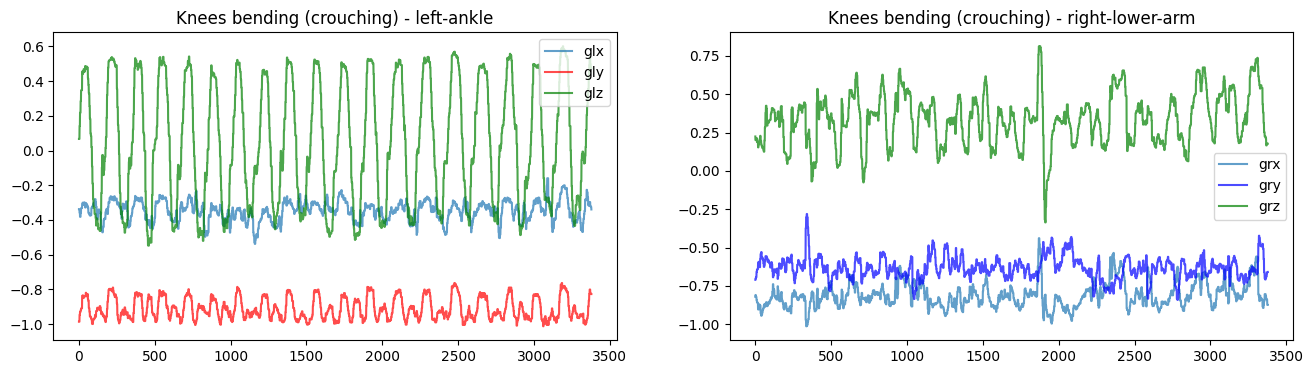

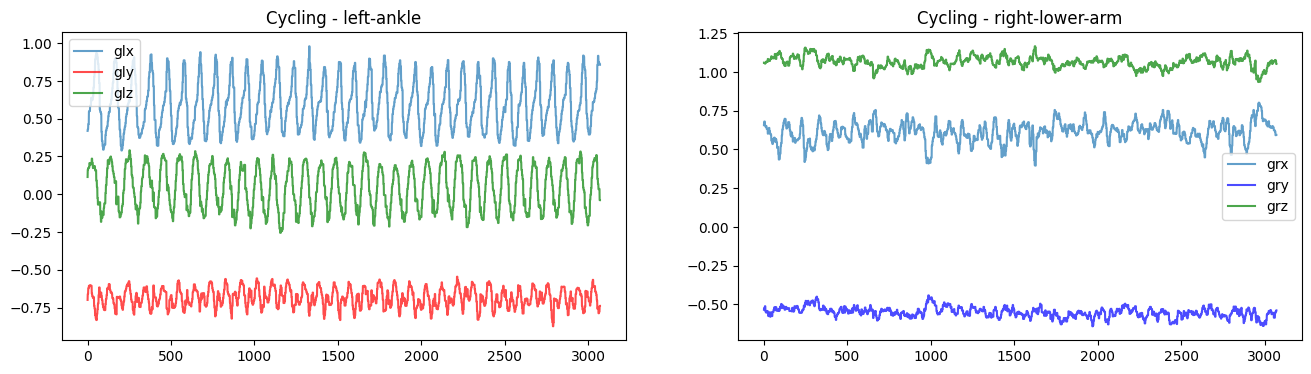

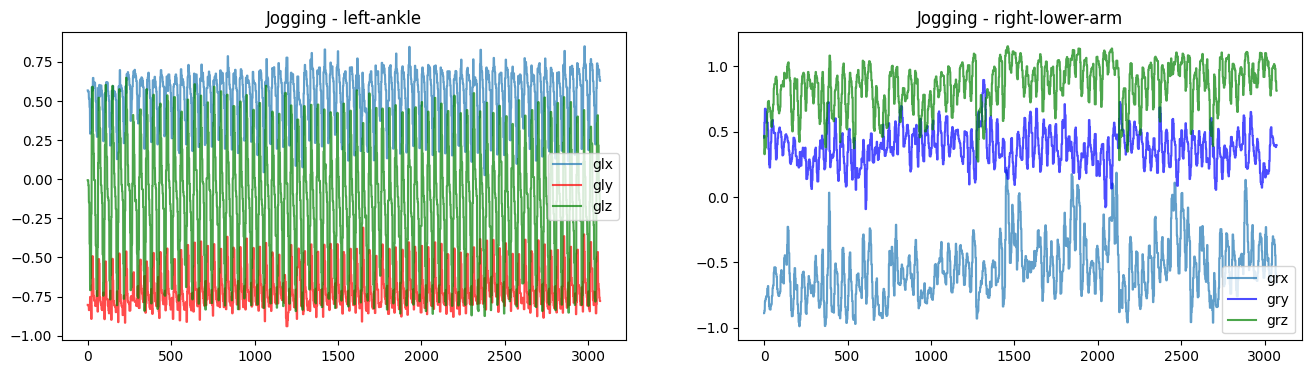

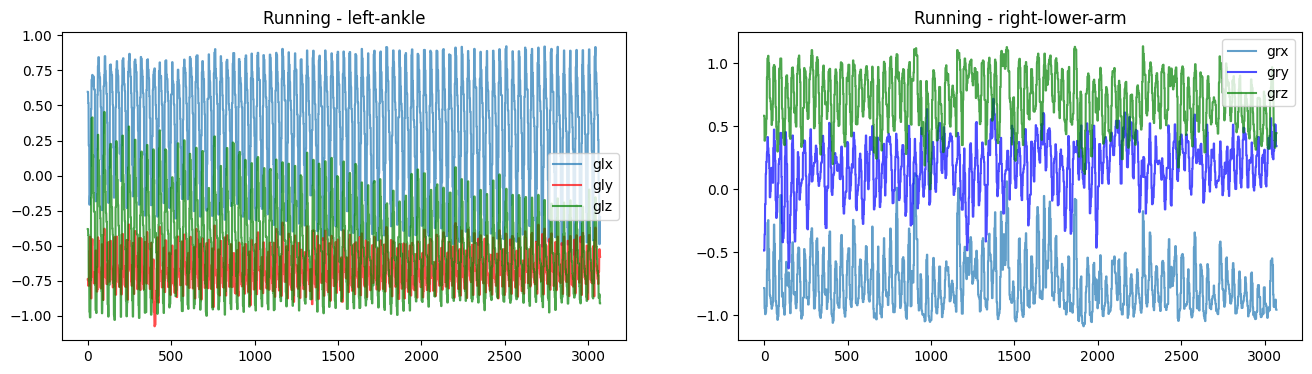

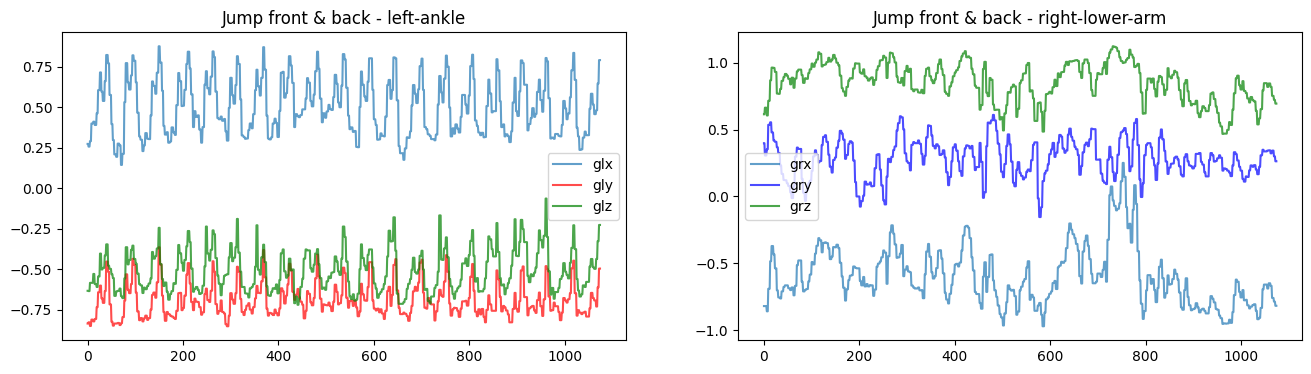

In [12]:
plot_comparison(subject1,'gyroscope')

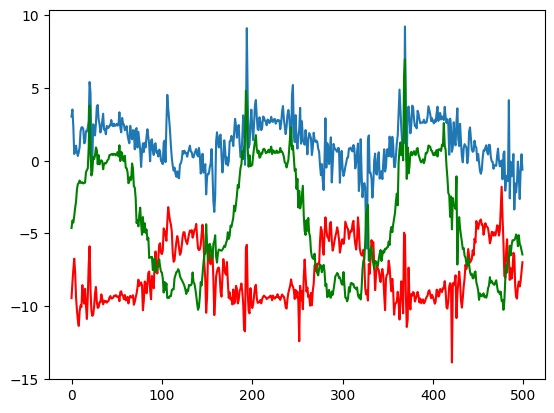

In [13]:
plt.plot(subject1[subject1.Activity == 8].reset_index(drop=True).head(500)['alx'])
plt.plot(subject1[subject1.Activity == 8].reset_index(drop=True).head(500)['aly'], color='red')
plt.plot(subject1[subject1.Activity == 8].reset_index(drop=True).head(500)['alz'], color='green')

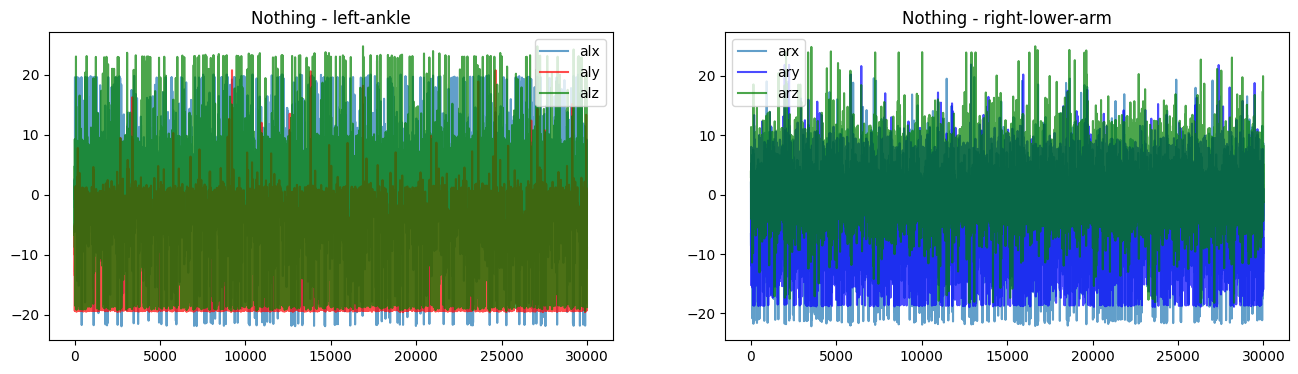

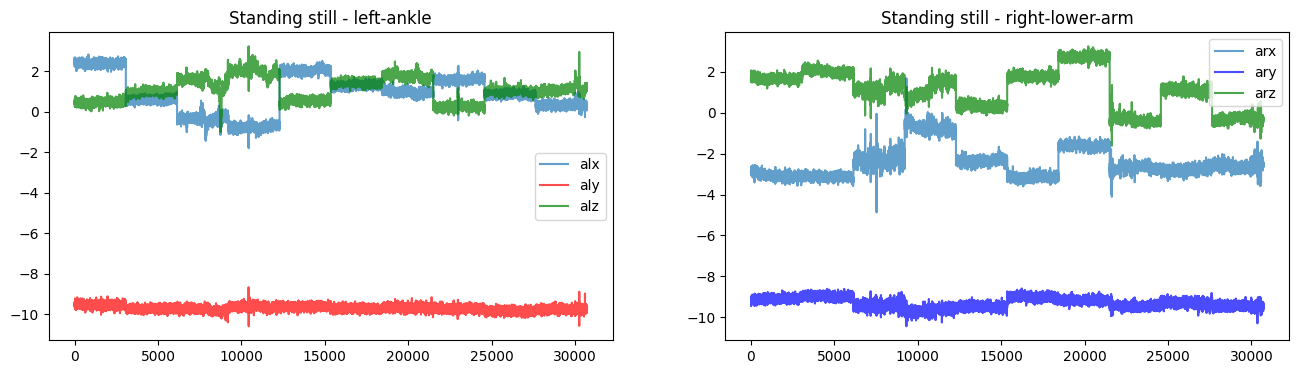

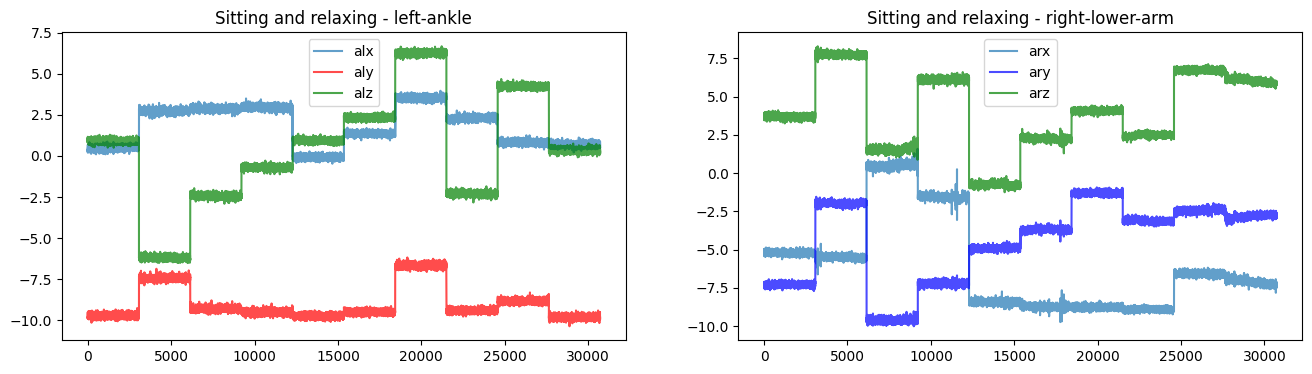

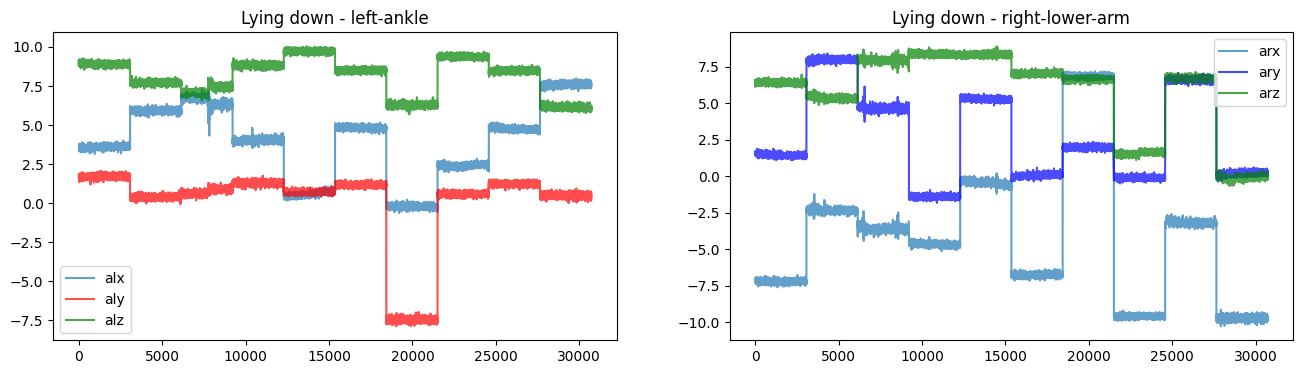

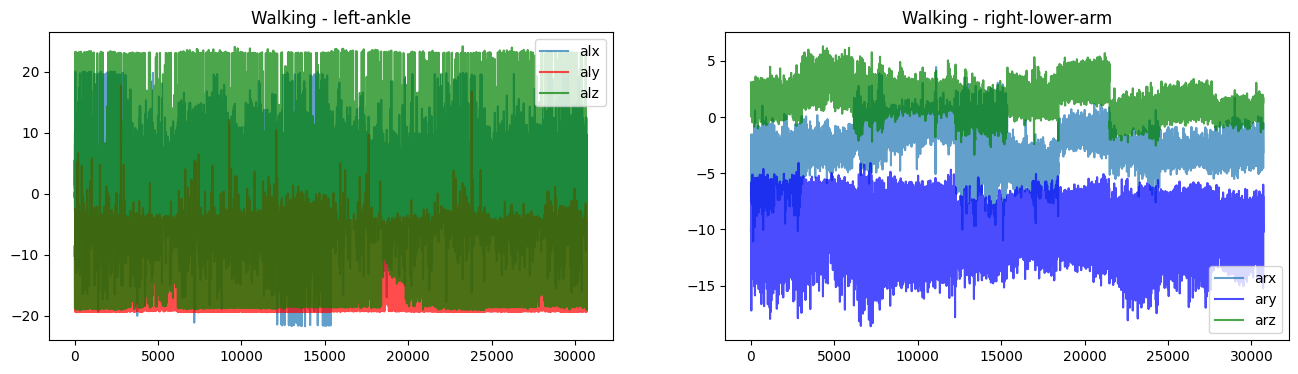

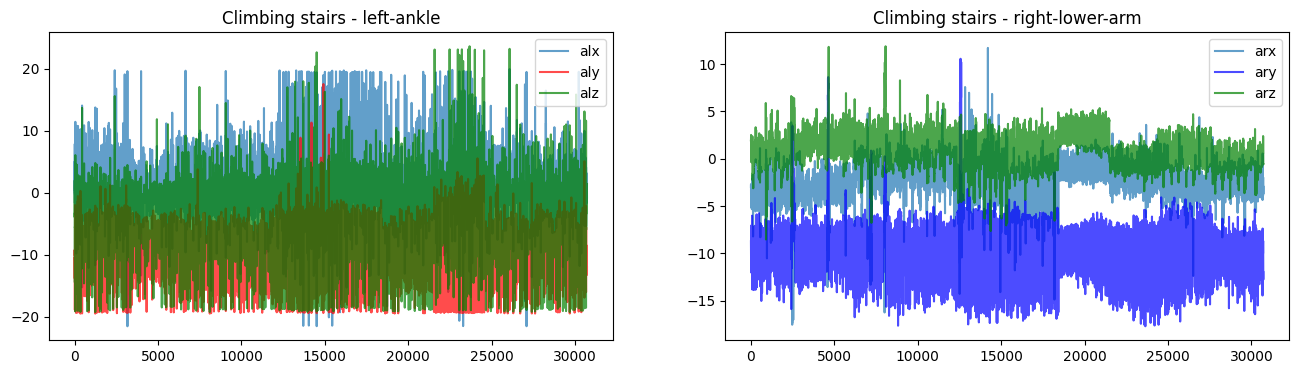

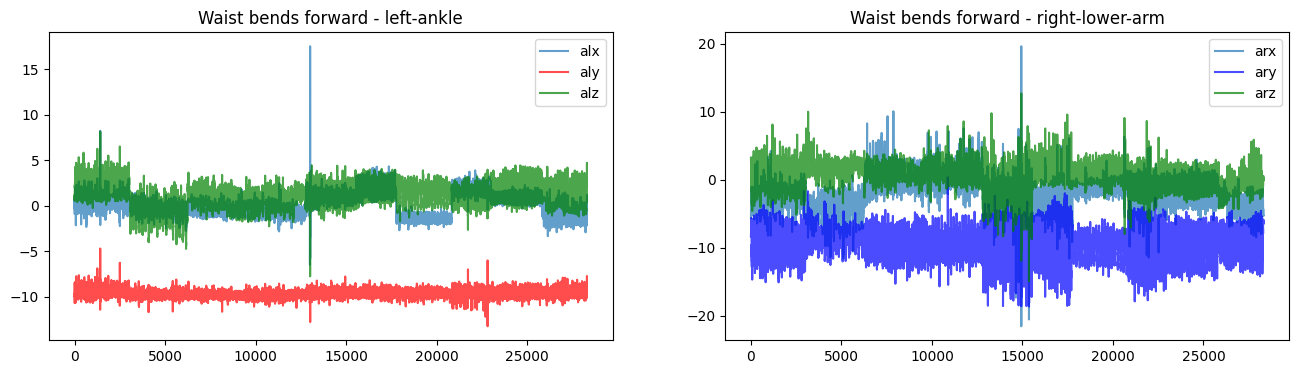

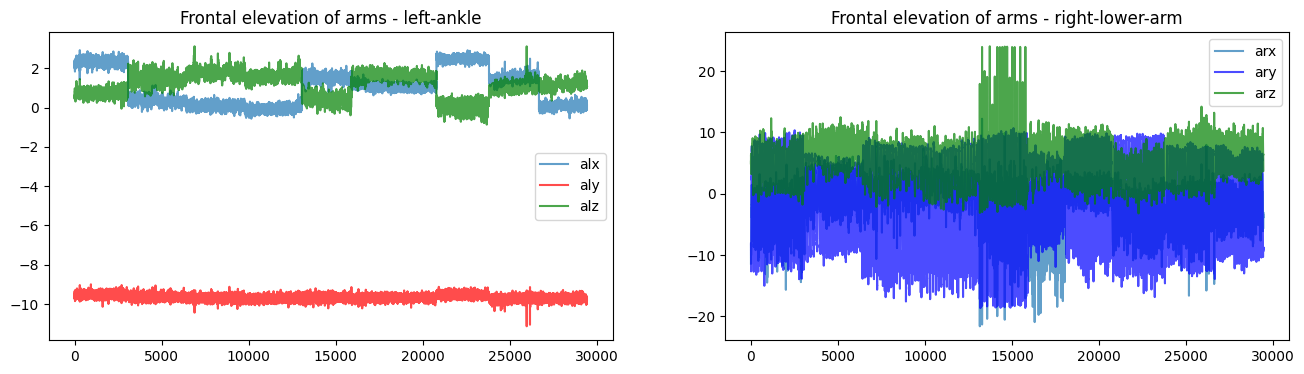

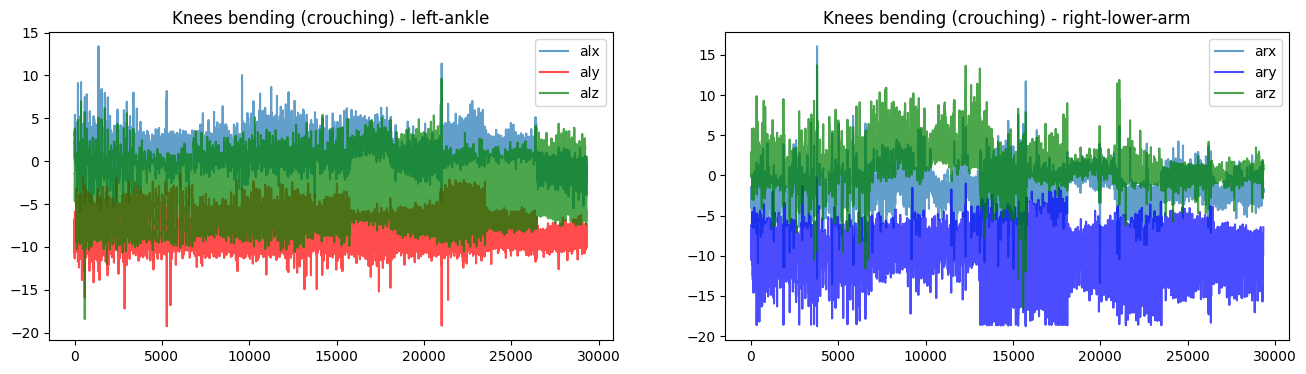

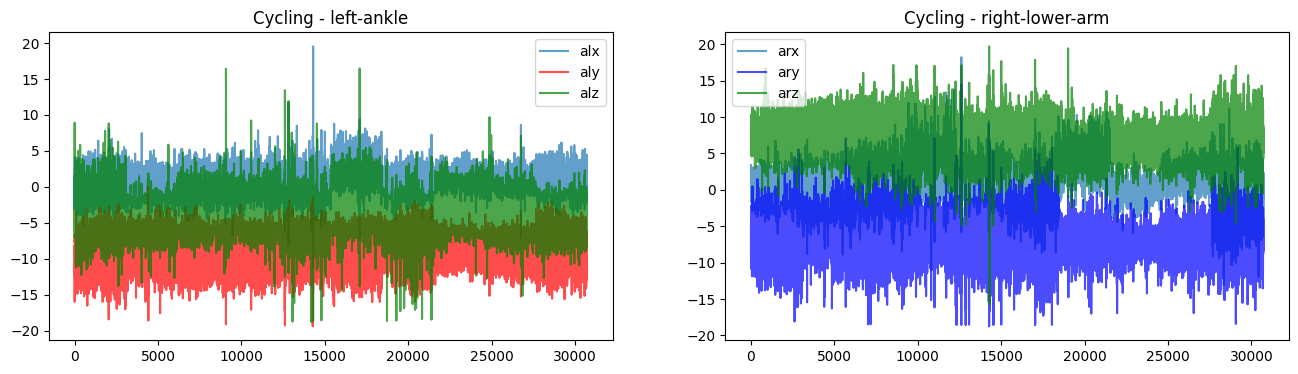

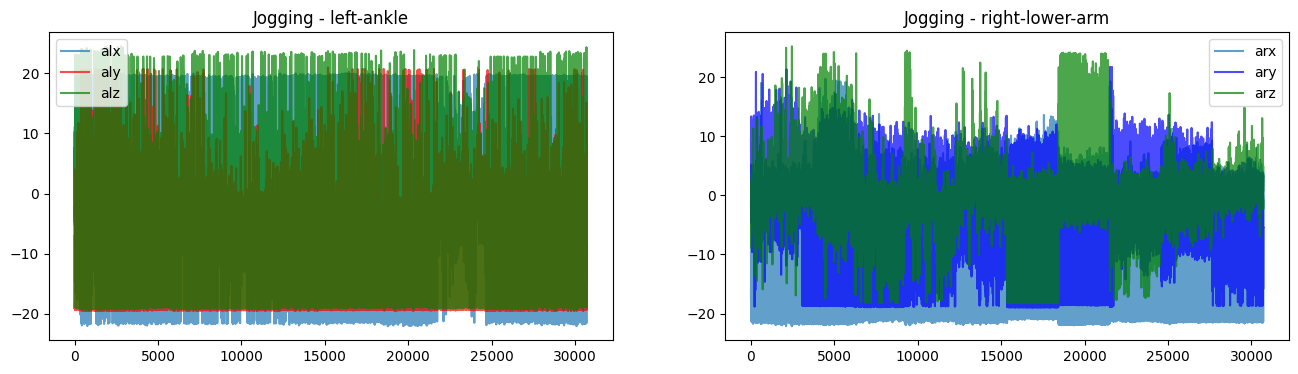

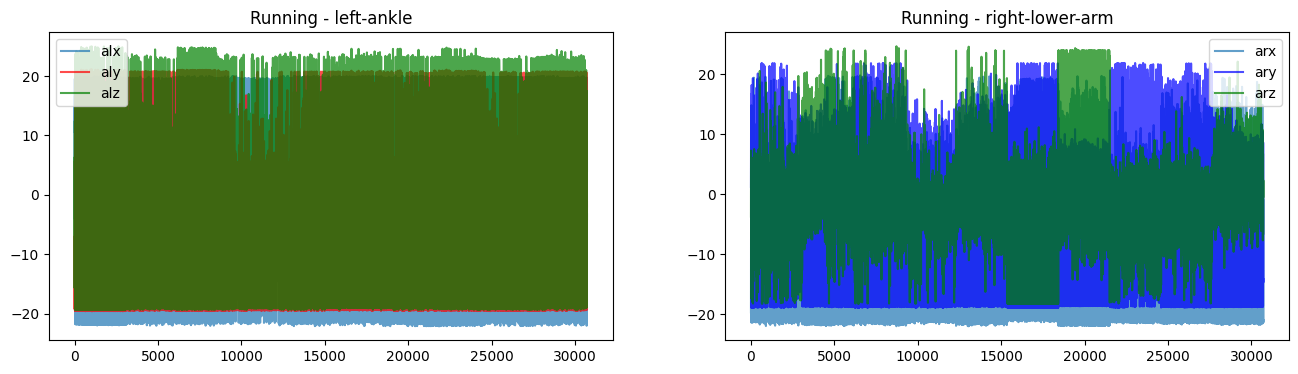

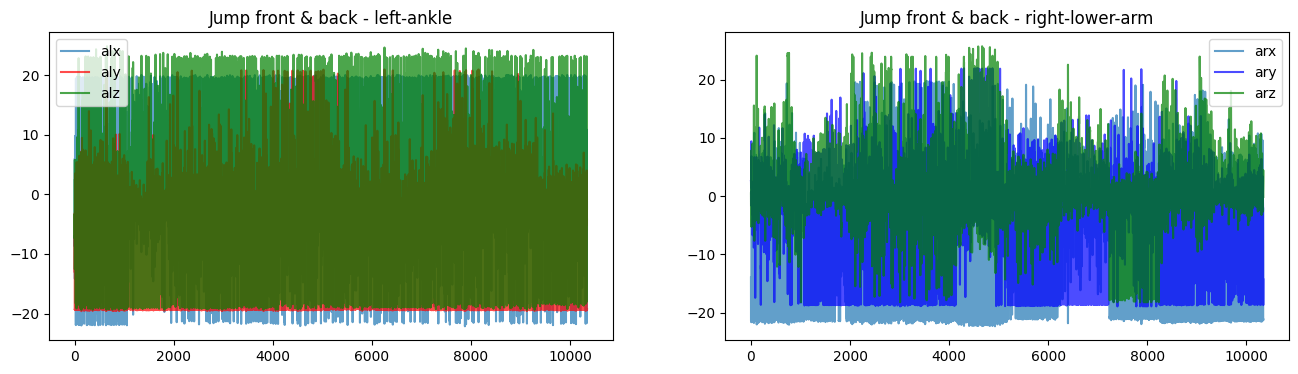

In [14]:
plot_comparison(df)

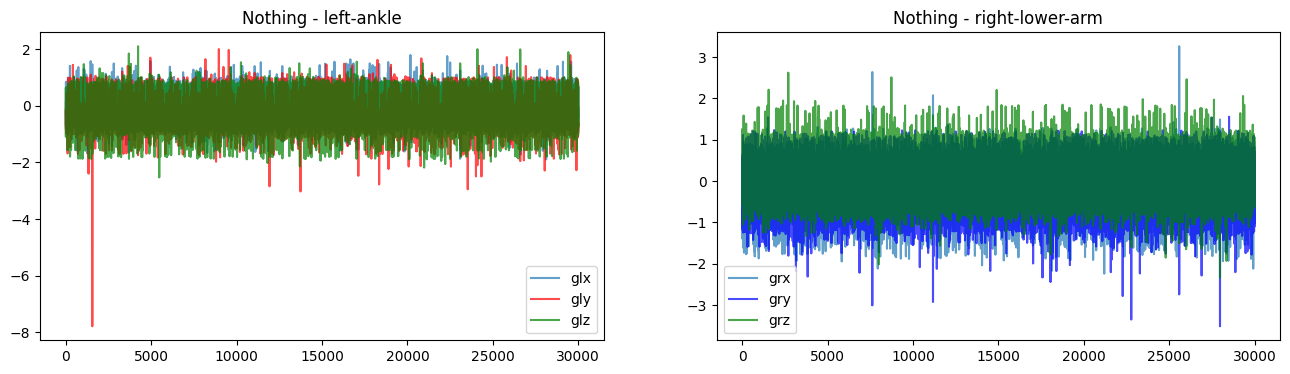

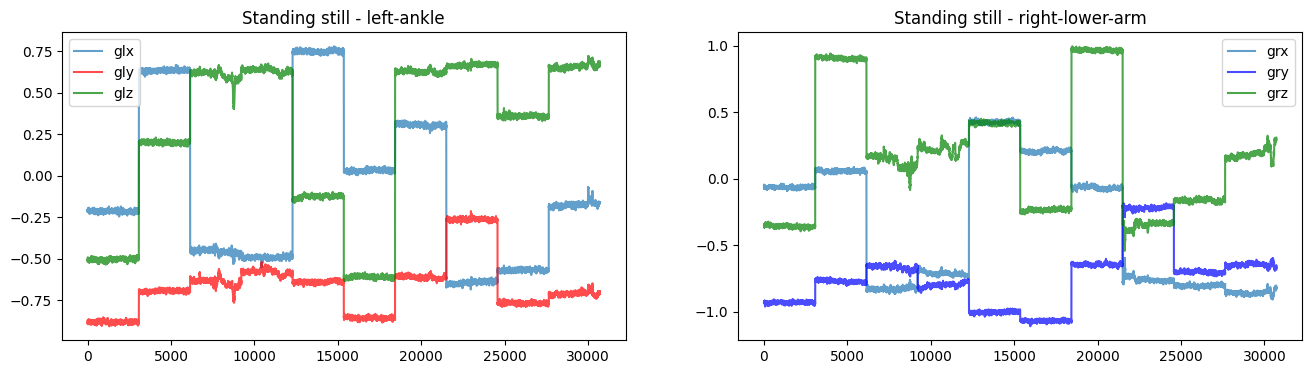

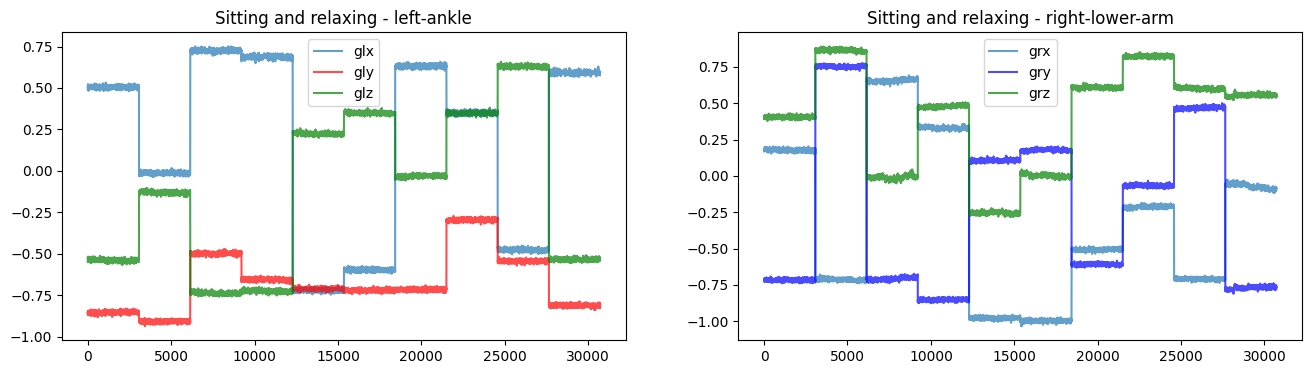

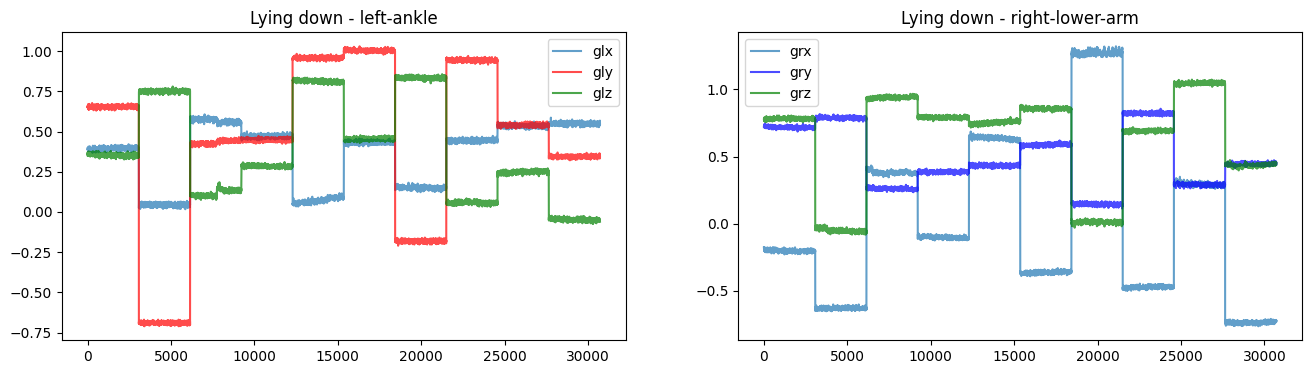

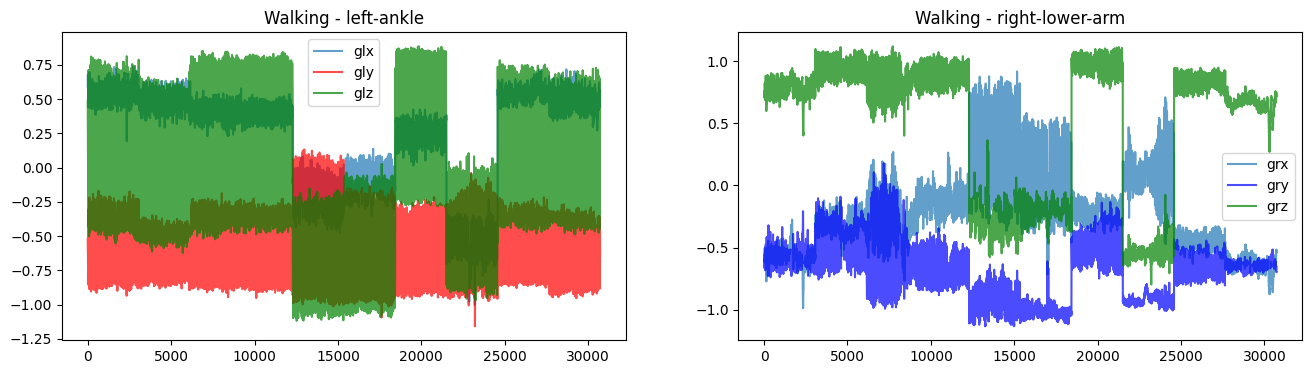

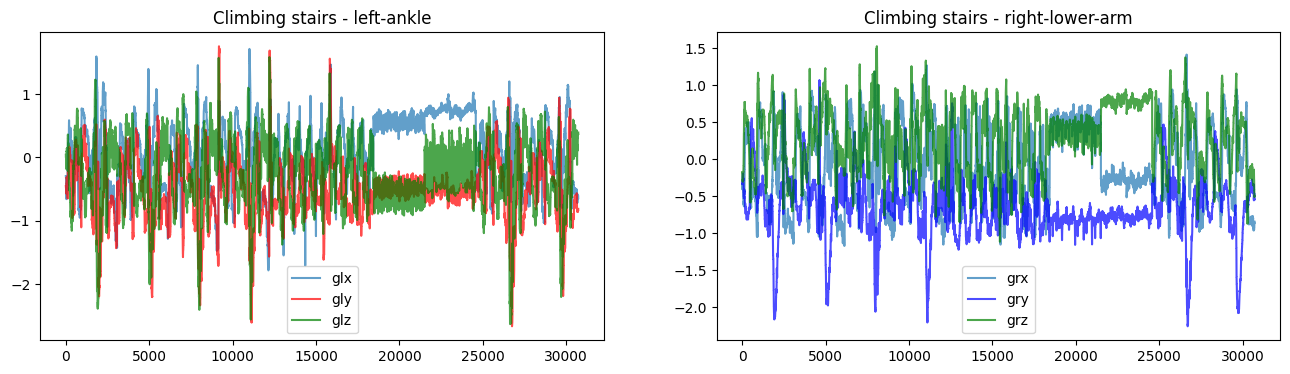

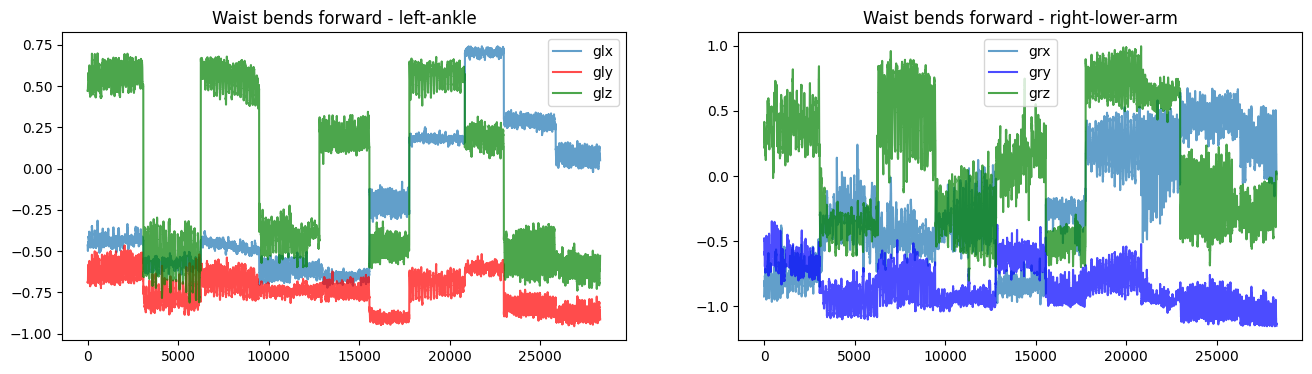

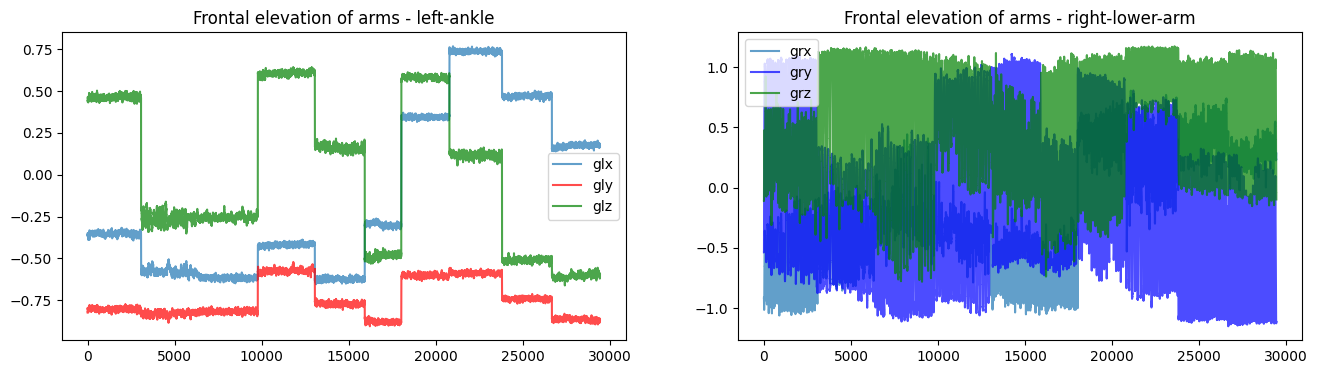

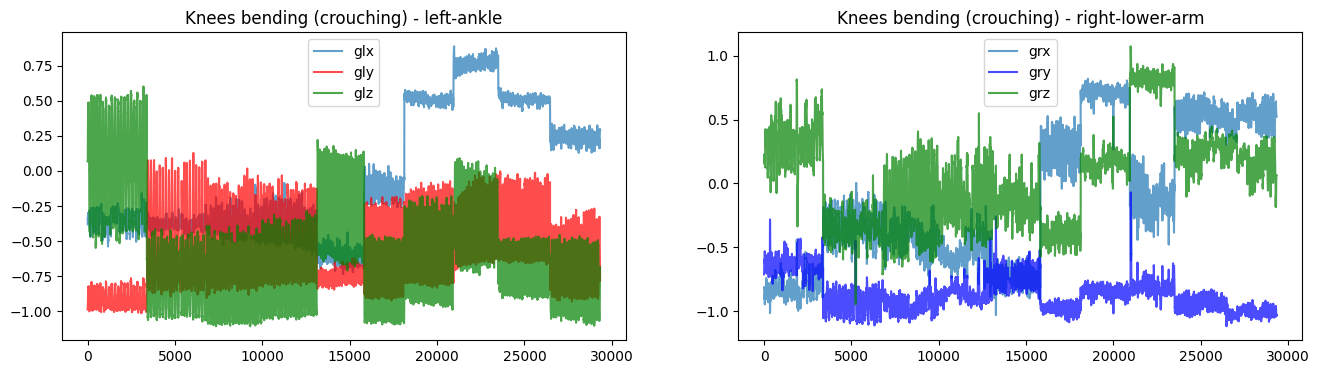

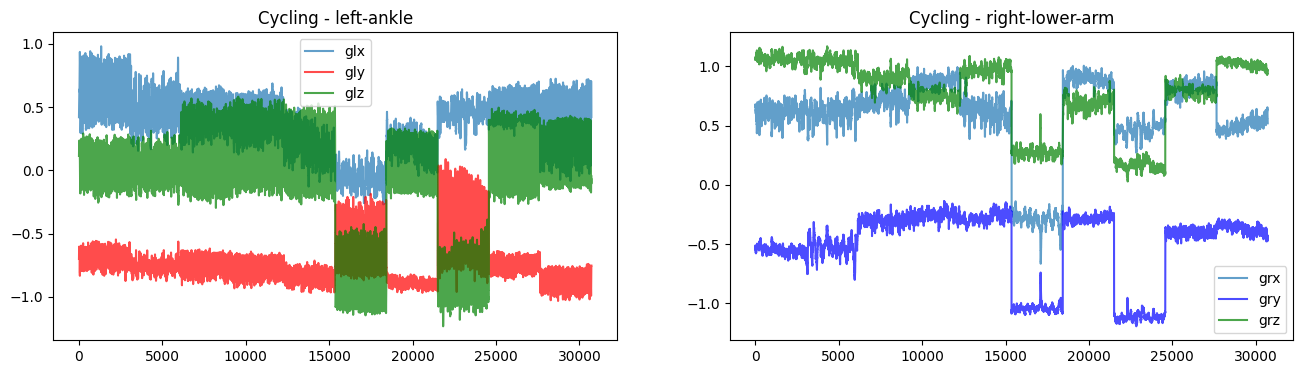

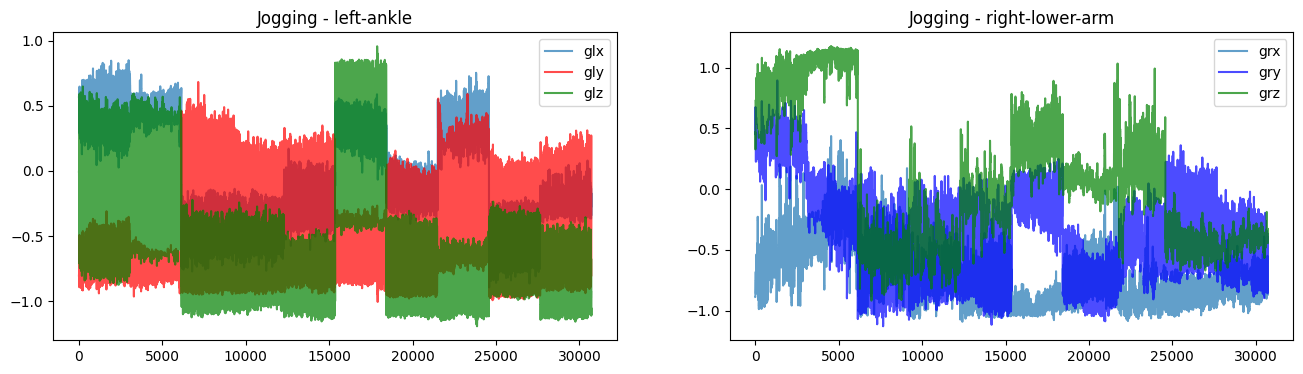

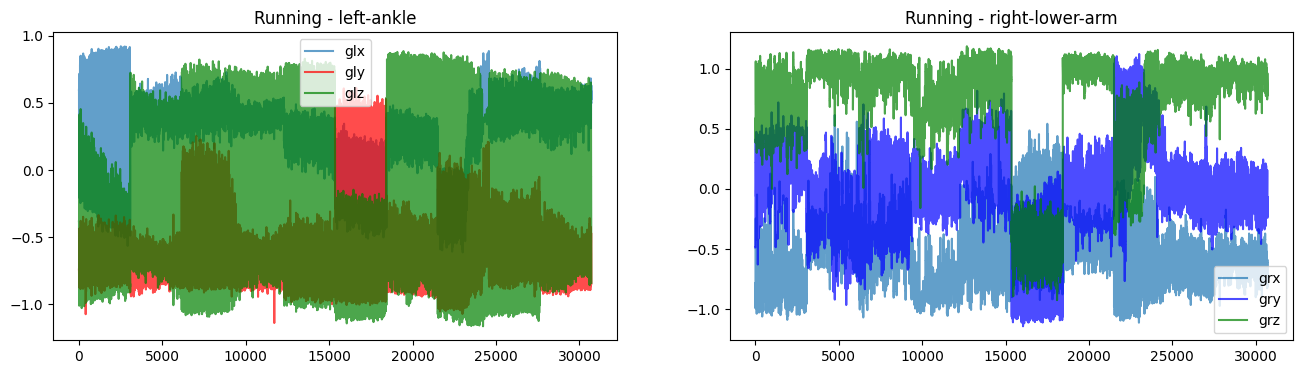

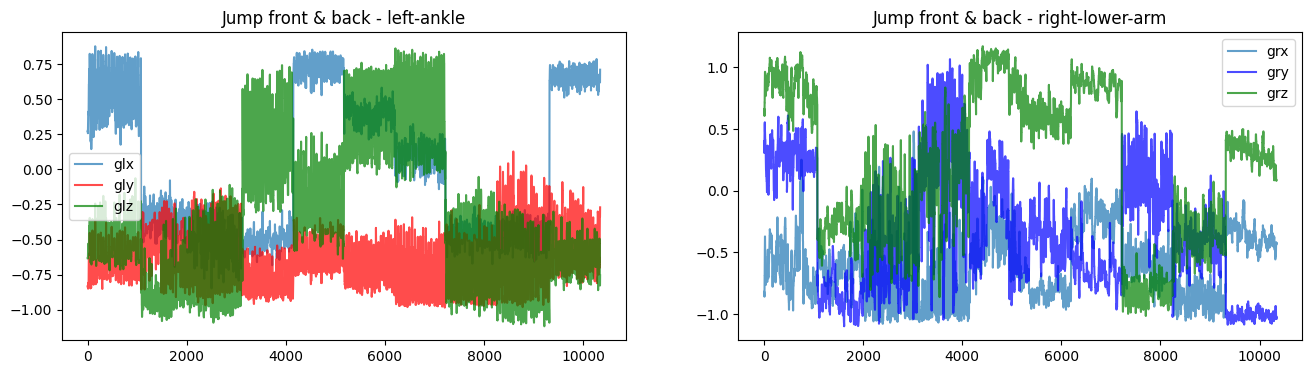

In [15]:
plot_comparison(df,'gyroscope')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flex

<Figure size 800x600 with 0 Axes>

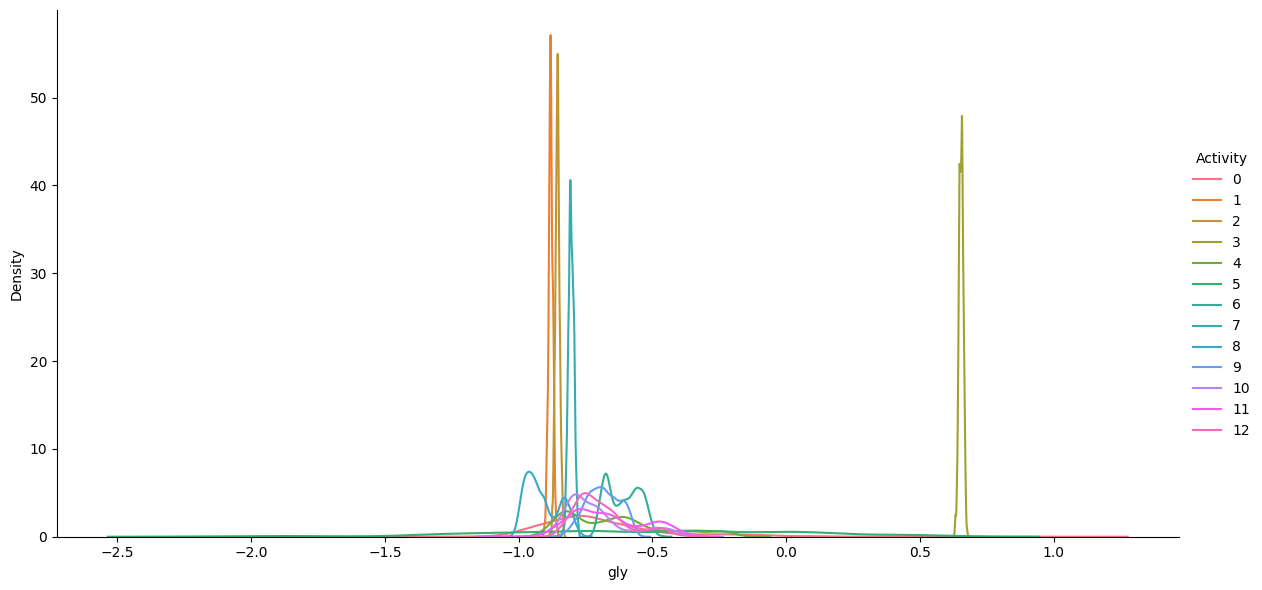

In [16]:
plt.figure(figsize=(8,6))
facetgrid = sns.FacetGrid(subject1, hue='Activity', height=6, aspect=2)
facetgrid.map(sns.distplot,'gly', hist=False).add_legend()
plt.show()

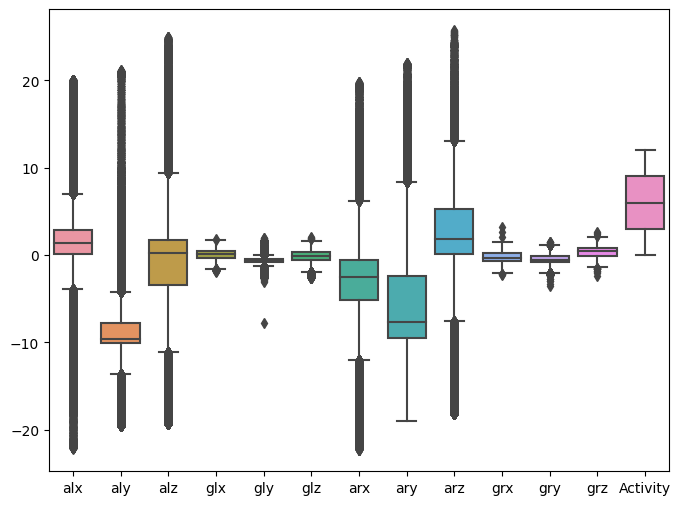

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df)
plt.show()

In [18]:
df.describe().T

count      mean       std      min        25%      50%       75%  \
alx       373195.0  1.769892  4.170916 -22.1460   0.158585  1.36530  2.882800   
aly       373195.0 -9.129392  5.099059 -19.6190 -10.078000 -9.60650 -7.729550   
alz       373195.0 -0.726522  6.352714 -19.3730  -3.367750  0.29864  1.758900   
glx       373195.0  0.090064  0.463424  -1.8942  -0.356220  0.18367  0.484230   
gly       373195.0 -0.557242  0.427327  -7.7899  -0.810510 -0.69043 -0.493430   
glz       373195.0 -0.125431  0.554969  -2.6267  -0.571710 -0.11002  0.349710   
arx       373195.0 -3.479793  5.777091 -22.3450  -5.168800 -2.53510 -0.604030   
ary       373195.0 -5.783452  6.491917 -18.9720  -9.542300 -7.71090 -2.372400   
arz       373195.0  2.383944  4.147091 -18.2390   0.138490  1.83120  5.287550   
grx       373195.0 -0.209537  0.547640  -2.2392  -0.686270 -0.30784  0.250980   
gry       373195.0 -0.416615  0.547825  -3.5113  -0.837780 -0.60164 -0.053388   
grz       373195.0  0.368275  0.522338  -2.3362  -0.056034  0.43534  0.834050   
Activity  373195.0  5.673112  3.580681   0.0000   3.000000  6.00000  9.000000   

              max  
alx       20.0440  
aly       21.1610  
alz       25.0150  
glx        1.7941  
gly        2.0038  
glz        2.1022  
arx       19.8010  
ary       21.9650  
arz       25.7410  
grx        3.2588  
gry        1.5565  
grz        2.6207  
Activity  12.0000

In [19]:
#Dropping feature have data outside 98% confidence interval
df1 = df.copy()
for feature in df1.columns[:-2]:
  lower_range = np.quantile(df[feature],0.01)
  upper_range = np.quantile(df[feature],0.99)
  print(feature,'range:',lower_range,'to',upper_range)

  df1 = df1.drop(df1[(df1[feature]>upper_range) | (df1[feature]<lower_range)].index, axis=0)
  print('shape',df1.shape)

alx range: -11.47312 to 19.233
shape (365733, 14)
aly range: -19.379 to 2.447871999999997
shape (360018, 14)
alz range: -18.95 to 14.19623999999999
shape (356270, 14)
glx range: -0.74212 to 0.80705
shape (349377, 14)
gly range: -1.0694 to 0.96623
shape (342841, 14)
glz range: -1.1061 to 0.8290799999999999
shape (337391, 14)
arx range: -21.492 to 9.097647999999998
shape (332307, 14)
ary range: -18.694000000000003 to 11.948059999999998
shape (326241, 14)
arz range: -10.367 to 11.823119999999996
shape (323674, 14)
grx range: -1.0196 to 0.95686
shape (320188, 14)
gry range: -1.1417 to 0.90965
shape (315352, 14)
grz range: -0.69828 to 1.125
shape (310929, 14)


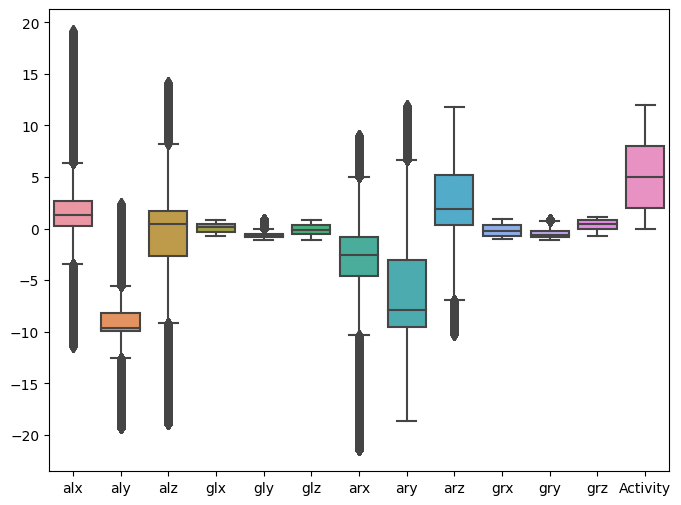

In [20]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df1)
plt.show()

In [21]:
label_map = {
    0: 'Nothing',
    1: 'Standing still',  
    2: 'Sitting and relaxing', 
    3: 'Lying down',  
    4: 'Walking',  
    5: 'Climbing stairs',  
    6: 'Waist bends forward',
    7: 'Frontal elevation of arms', 
    8: 'Knees bending (crouching)', 
    9: 'Cycling', 
    10: 'Jogging', 
    11: 'Running', 
    12: 'Jump front & back' 
}

# Modeling Data Preparation

Follow this ****[notebook](https://www.kaggle.com/gaurav2022/eda-dataviz-resample/)**** to see how I select time frame for model data preparation.

In [22]:
#spliting data into train and test set
print(df1.shape)
train = df1[(df1['subject'] != 'subject10') & (df1['subject'] != 'subject9')]
test = df1.drop(train.index, axis=0)
train.shape,test.shape

(310929, 14)


((246501, 14), (64428, 14))

In [23]:
X_train = train.drop(['Activity','subject'],axis=1)
y_train = train['Activity']
X_test = test.drop(['Activity','subject'],axis=1)
y_test = test['Activity']
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((246501, 12), (246501,), (64428, 12), (64428,))

In [24]:
from scipy import stats

#function to create time series datset for seuence modeling
def create_dataset(X, y, time_steps, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        x = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(x)
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

In [25]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((246501, 12), (246501,), (64428, 12), (64428,))

# Model building

In [26]:
pip install tensorflow-addons


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 9.9 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.1
    Uninstalling typeguard-4.4.1:
      Successfully uninstalled typeguard-4.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.4.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.
ydata-profiling 4.12.1 requires typeguard<5,>=3, but you have typeguard 2.13.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [27]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Initialize the model
model = keras.Sequential()

# Input Layer
model.add(layers.Input(shape=[100, 12]))

# First Conv1D Layer with reduced filters and kernel size
model.add(layers.Conv1D(filters=64, kernel_size=3, padding="same", activation='relu', kernel_regularizer=l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))  # Moderate dropout to prevent overfitting

# Second Conv1D Layer with reduced filters
model.add(layers.Conv1D(filters=128, kernel_size=3, padding="same", activation='relu', kernel_regularizer=l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))  # Moderate dropout

# MaxPool1D for dimensionality reduction
model.add(layers.MaxPool1D(pool_size=2))

# Add Bidirectional LSTM with reduced size
model.add(layers.Bidirectional(layers.LSTM(128, return_sequences=True)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))  # Moderate dropout

# GlobalAveragePooling1D for better feature extraction (alternative to GlobalMaxPooling1D)
model.add(layers.GlobalAveragePooling1D())

# Dense layer with L2 regularization and reduced units
model.add(layers.Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(layers.Dropout(0.4))  # Moderate dropout

# Output Layer with 13 classes (softmax)
model.add(layers.Dense(13, activation='softmax'))

# Print the model summary
model.summary()

# Optimizer with learning rate decay
lr_schedule = ExponentialDecay(initial_learning_rate=0.0001, decay_steps=100000, decay_rate=0.96, staircase=True)
optimizer = Adam(learning_rate=lr_schedule)

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 100, 64)             │           2,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 100, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 100, 128)            │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 100, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 50, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 50, 256)             │         263,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 50, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 13)                  │           3,341 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 361,165 (1.38 MB)

 Trainable params: 360,269 (1.37 MB)

 Non-trainable params: 896 (3.50 KB)

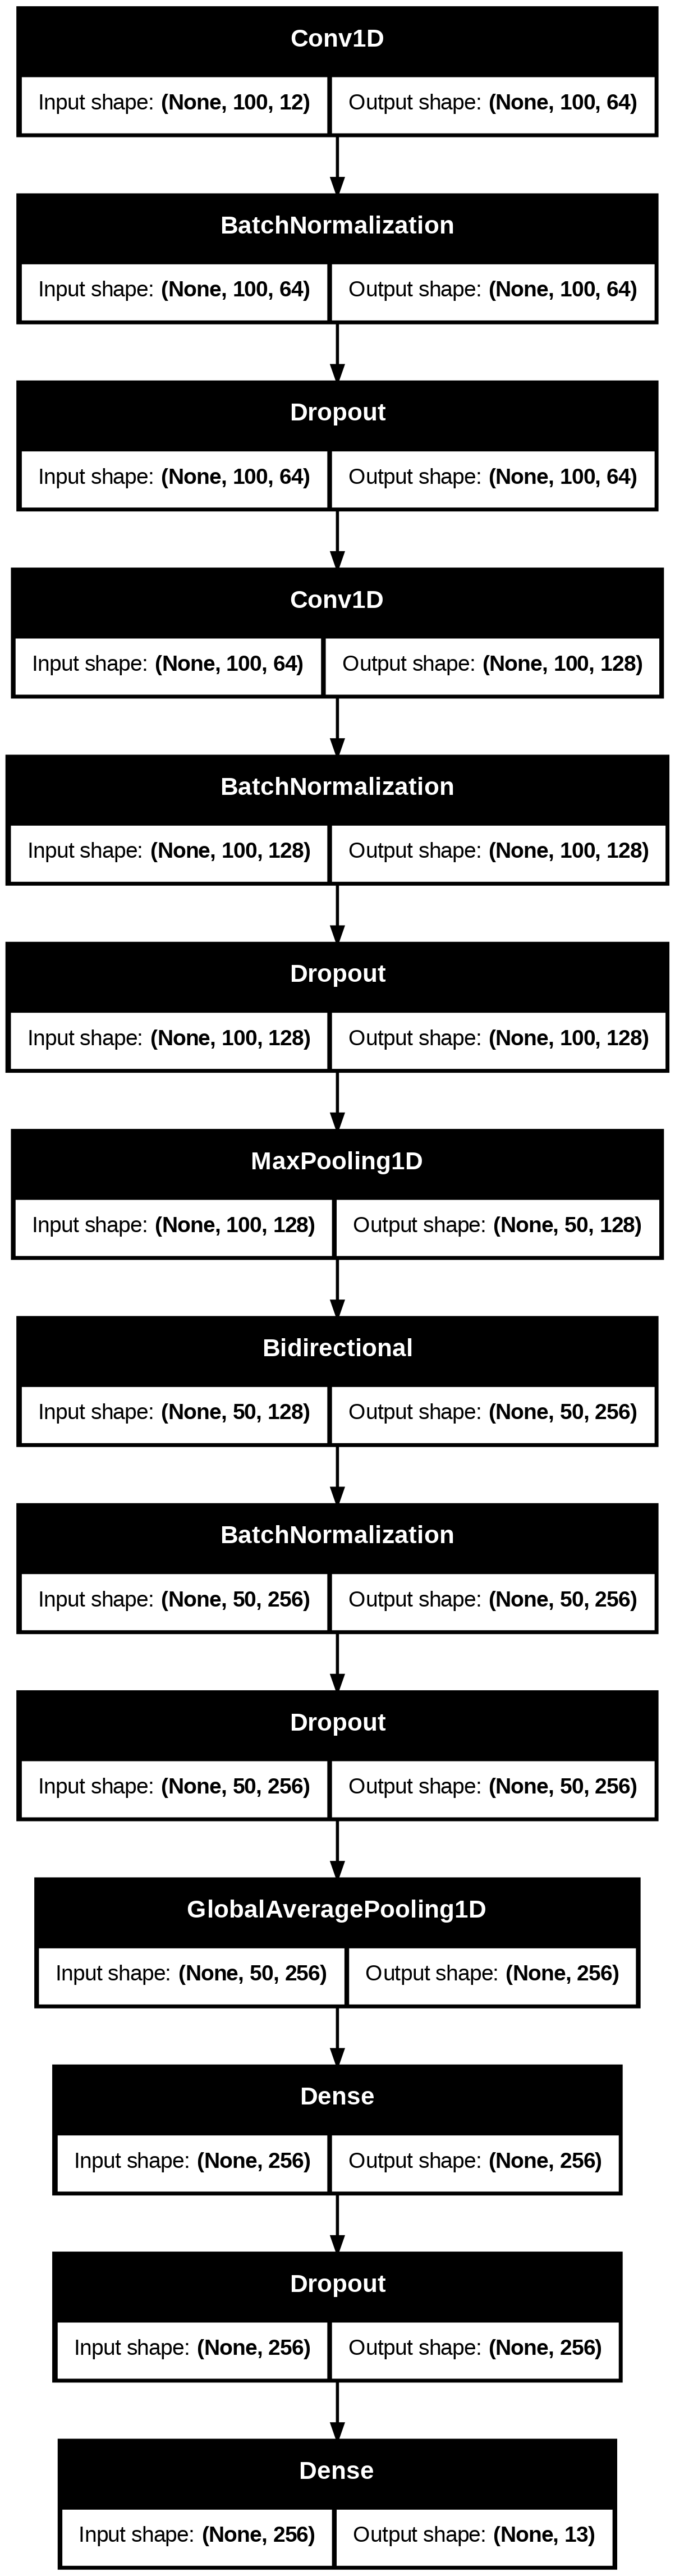

In [28]:
import tensorflow as tf

# Plot the model with input/output shapes
tf.keras.utils.plot_model(model, show_shapes=True)


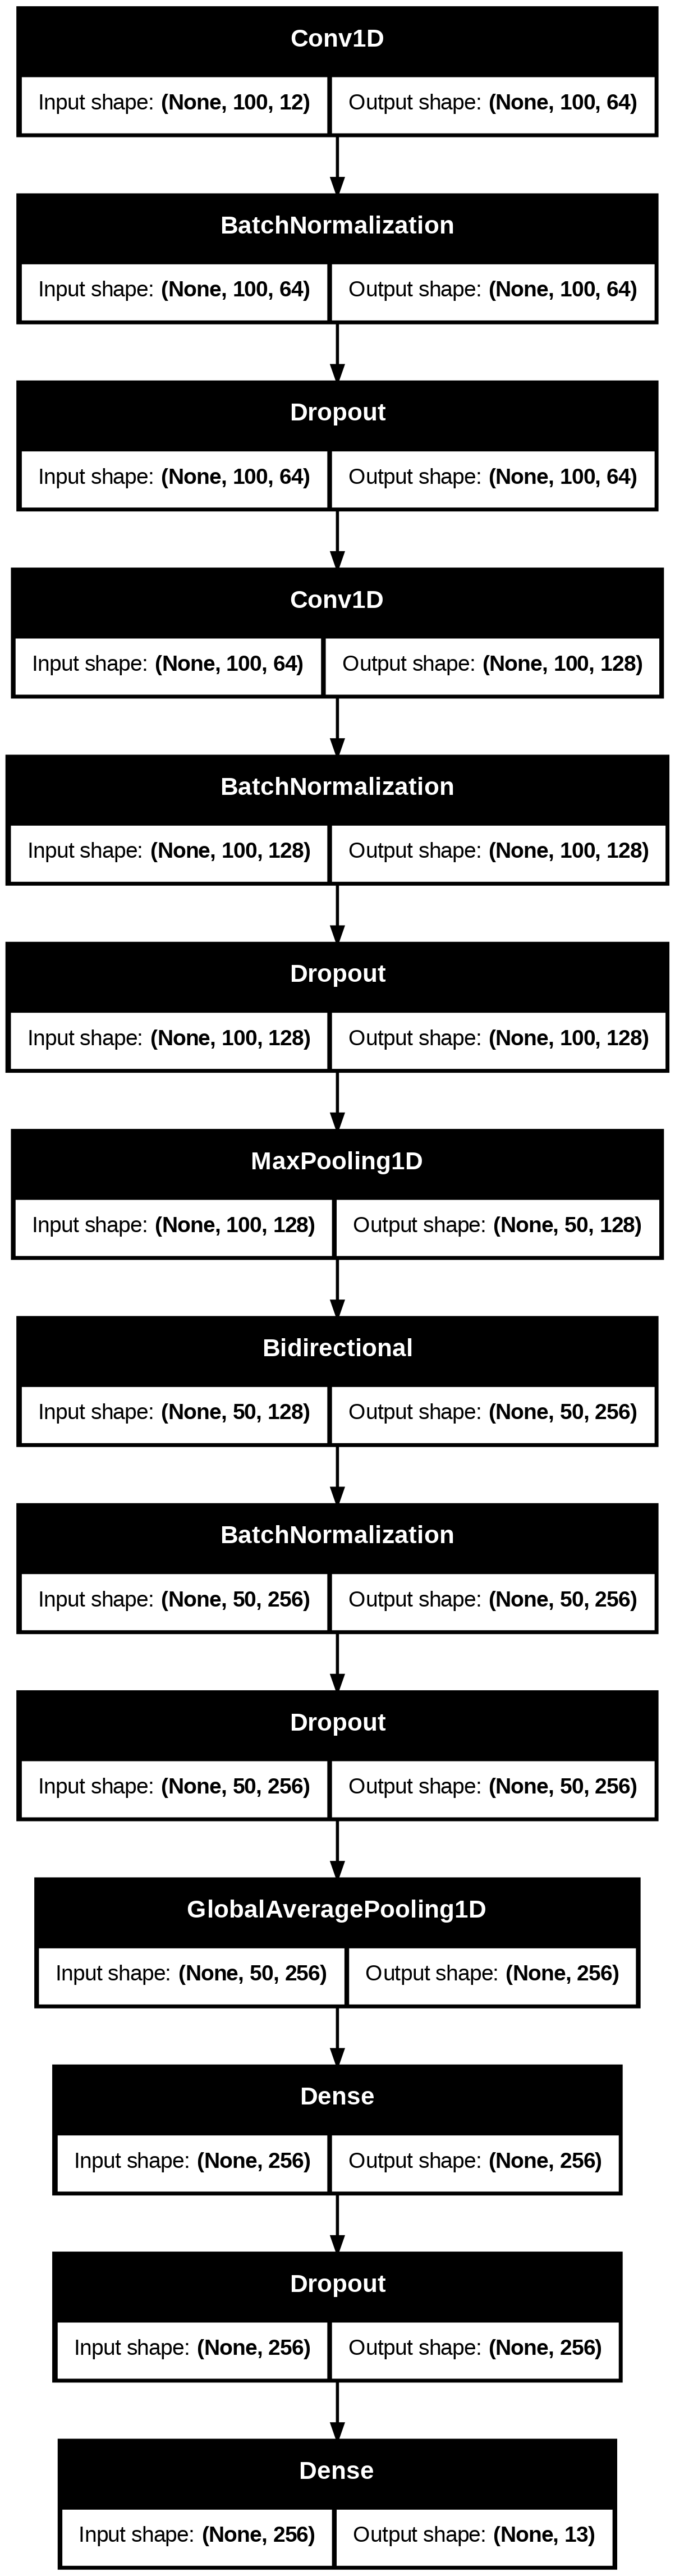

In [29]:

import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [30]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from scipy import stats
import numpy as np

# Define the learning rate scheduler function (you may adjust the function)
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.9  # Decay by 10% after 10 epochs

# Learning rate scheduler and early stopping
lr_scheduler = LearningRateScheduler(scheduler, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True, verbose=1)

# ModelCheckpoint to save the best model based on validation loss
callbacks = [
    ModelCheckpoint("mhealth_best.keras", save_best_only=True, monitor="val_loss", verbose=1),
    early_stopping,
    lr_scheduler
]

# Function to create dataset for time-series
def create_dataset(X, y, time_steps, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        x = X.iloc[i: i + time_steps]
        labels = y.iloc[i: i + time_steps]
        
        # Find the mode and handle the result
        mode_result = stats.mode(labels)
        
        if isinstance(mode_result.mode, np.ndarray):
            mode_value = mode_result.mode[0]  # Get the first mode value (safe)
        else:
            mode_value = mode_result.mode  # It’s already a scalar value
        
        Xs.append(x)
        ys.append(mode_value)
    
    return np.array(Xs), np.array(ys).reshape(-1, 1)

# Example data loading (ensure you have `train` and `test` DataFrames loaded)
X_train = train.drop(['Activity', 'subject'], axis=1)
y_train = train['Activity']
X_test = test.drop(['Activity', 'subject'], axis=1)
y_test = test['Activity']

# Create dataset for time-series with a window size of 100 and step size of 50
X_train, y_train = create_dataset(X_train, y_train, 100, step=50)
X_test, y_test = create_dataset(X_test, y_test, 100, step=50)

# Compile the model (using Adam optimizer, sparse categorical cross-entropy loss, sparse categorical accuracy)
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss="sparse_categorical_crossentropy", 
              metrics=["sparse_categorical_accuracy"])

# Train the model with the adjusted callbacks
model_history = model.fit(
    X_train, y_train,
    epochs=100,  # Adjust the number of epochs based on your requirements
    validation_data=(X_test, y_test),
    batch_size=32,
    callbacks=callbacks
)



Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.0517 - sparse_categorical_accuracy: 0.7766
Epoch 1: val_loss improved from inf to 1.51879, saving model to mhealth_best.keras
155/155 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 1.0493 - sparse_categorical_accuracy: 0.7773 - val_loss: 1.5188 - val_sparse_categorical_accuracy: 0.7009 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4266 - sparse_categorical_accuracy: 0.9685
Epoch 2: val_loss improved from 1.51879 to 0.43289, saving model to mhealth_best.keras
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.4264 - sparse_categorical_accuracy: 0.9685 - val_loss: 0.4329 - val_sparse_categorical_accuracy: 0.9246 - learning_rate: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/100
151

# Model Evaluation

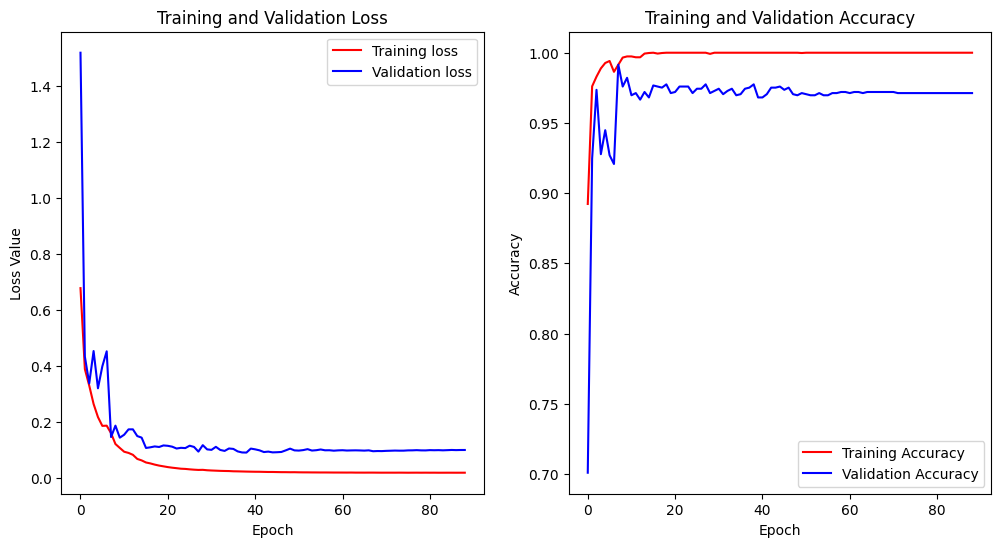

In [31]:
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
train_accuracy = model_history.history['sparse_categorical_accuracy']
val_accuracy = model_history.history['val_sparse_categorical_accuracy']

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(train_loss, 'r', label='Training loss')
plt.plot(val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_accuracy, 'r', label='Training Accuracy')
plt.plot(val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [32]:
from tensorflow.keras.models import load_model

# Use the correct file extension (i.e., .keras)
model = load_model('./mhealth_best.keras')

# Evaluate the model on the training and testing sets
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Train Loss: {train_loss}, Train Accuracy: {train_acc}")
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")


155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0256 - sparse_categorical_accuracy: 0.9979
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0489 - sparse_categorical_accuracy: 0.9915
Train Loss: 0.025209208950400352, Train Accuracy: 0.9983769655227661
Test Loss: 0.08969283849000931, Test Accuracy: 0.9774670004844666


In [33]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis = 1)
pred = pred.reshape(-1,1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [34]:
pred.shape,y_test.shape

((1287, 1), (1287, 1))

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
 
print(classification_report(y_test,pred))
print('*'*50)
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       0.96      0.99      0.98       123
           2       0.99      1.00      1.00       123
           3       0.99      1.00      1.00       122
           4       0.98      0.96      0.97       120
           5       0.94      0.95      0.95        84
           6       0.91      0.97      0.94       106
           7       1.00      1.00      1.00       112
           8       0.96      0.87      0.91       116
           9       1.00      1.00      1.00       121
          10       0.99      1.00      0.99        89
          11       1.00      0.98      0.99        52
          12       1.00      1.00      1.00        27

    accuracy                           0.98      1287
   macro avg       0.98      0.98      0.98      1287
weighted avg       0.98      0.98      0.98      1287

**************************************************
[[ 92   0   0   0   0   0   

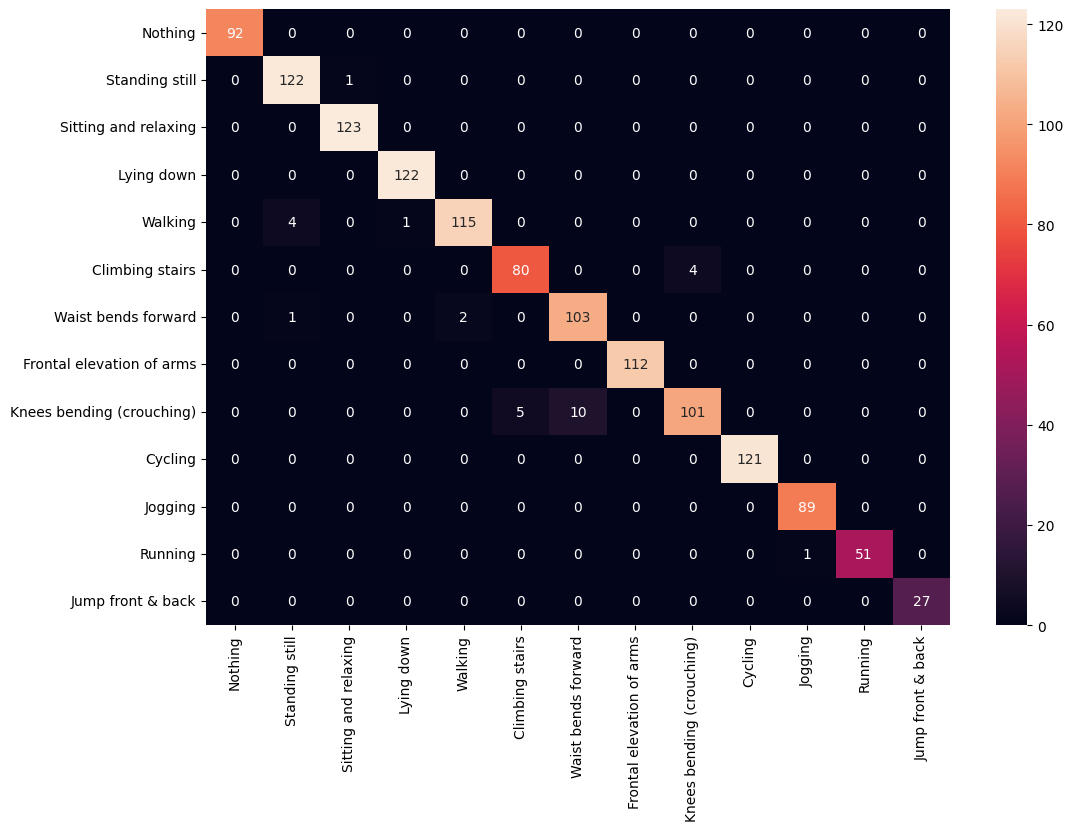

In [36]:
plt.figure(figsize=(12,8))
conf_matrix = confusion_matrix(y_test,pred)
sns.heatmap(conf_matrix, xticklabels= label_map.values(), yticklabels= label_map.values(), annot=True, fmt="d")
plt.show()

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


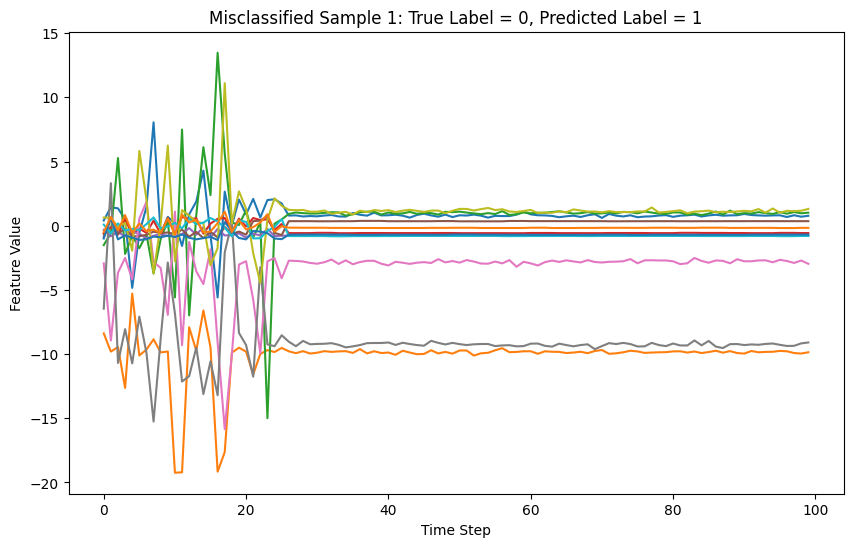

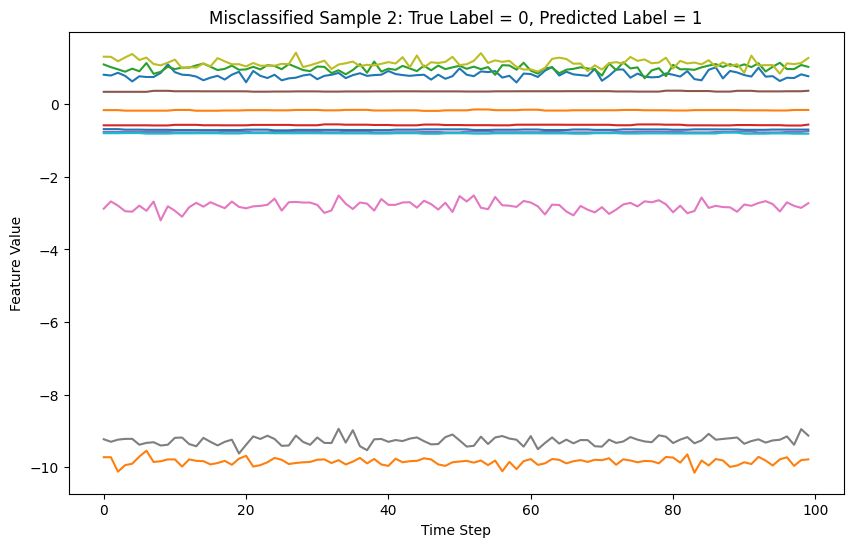

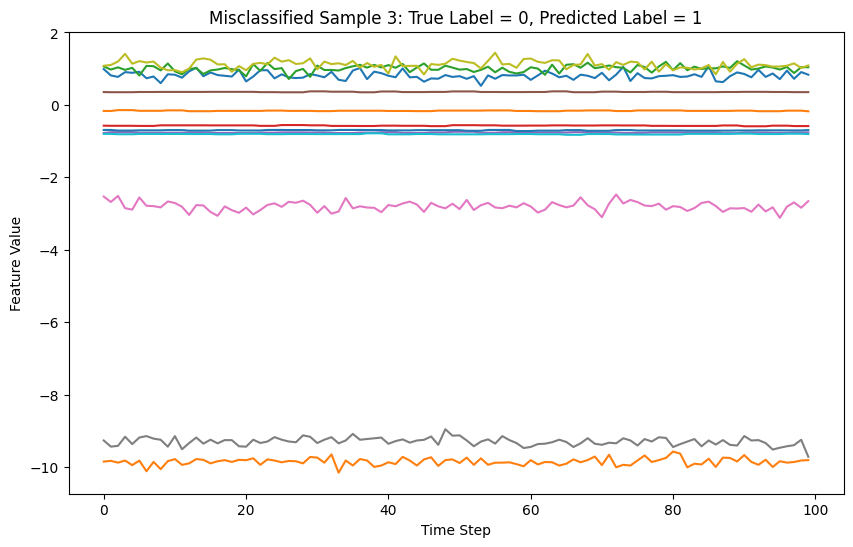

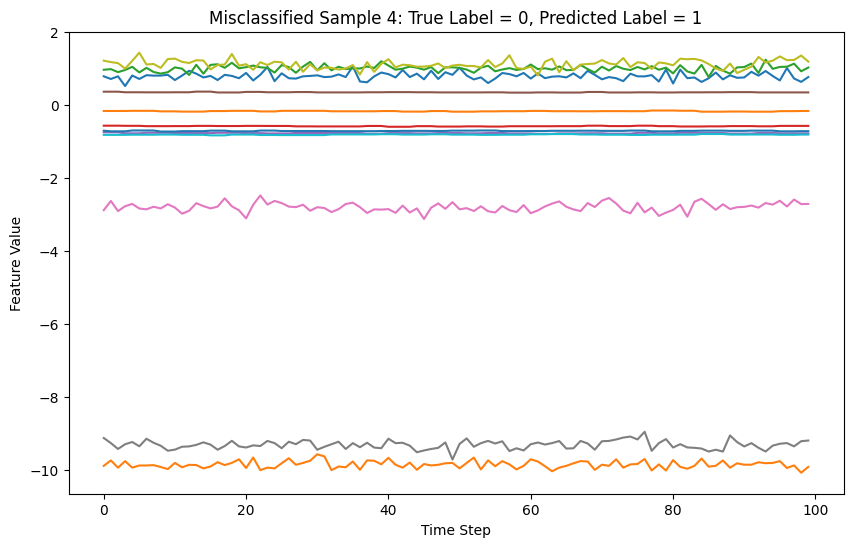

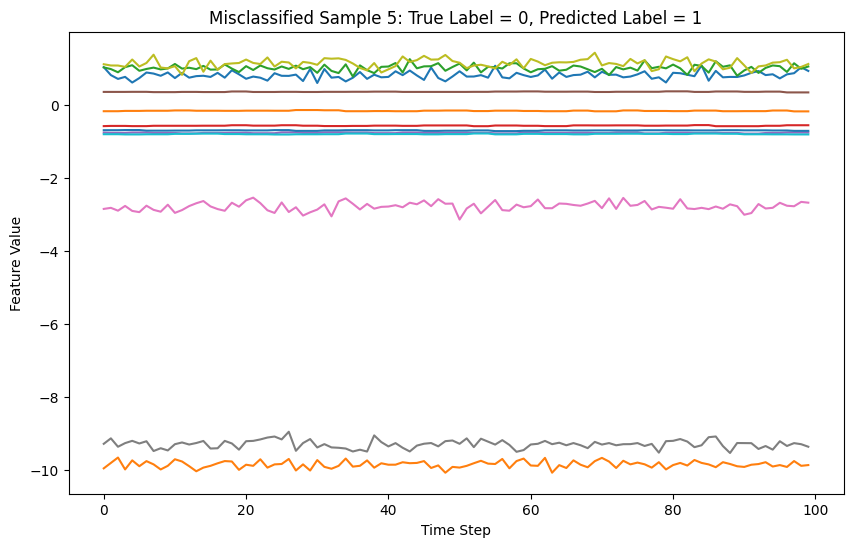

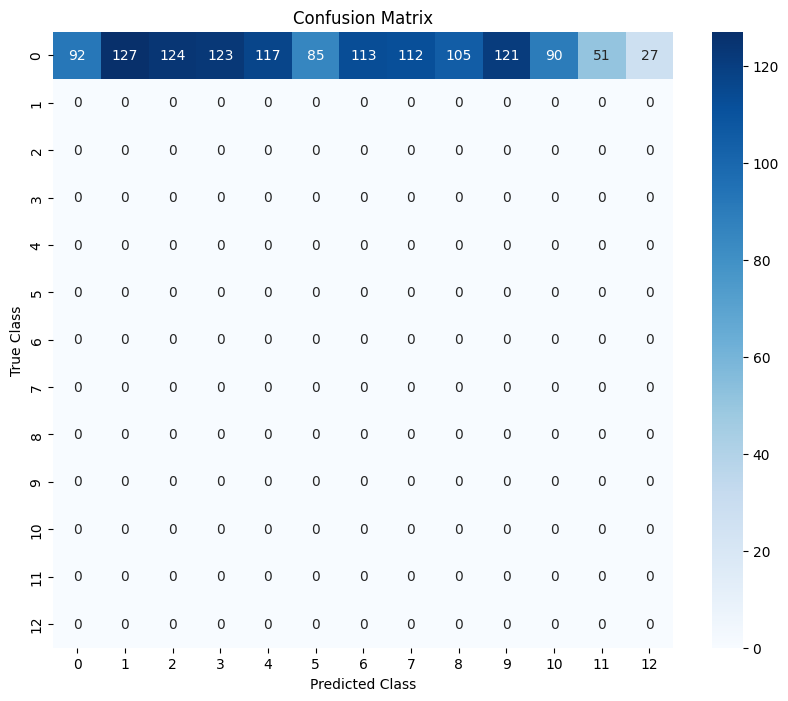

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Step 1: Predict on the test data
y_pred = model.predict(X_test)  # Shape of y_pred is (num_samples, 13) for softmax output

# Convert predicted probabilities to class labels (softmax output)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class index with max probability
y_true_classes = np.argmax(y_test, axis=1)  # True class labels

# Step 2: Identify Misclassifications
misclassified_indices = np.where(y_pred_classes != y_true_classes)[0]  # Indices of misclassified samples

# Step 3: Visualize Misclassified Instances
num_samples = 5  # Number of misclassified samples to plot
for i in range(num_samples):
    idx = misclassified_indices[i]  # Get the index of the misclassified sample
    true_label = y_true_classes[idx]
    pred_label = y_pred_classes[idx]
    
    # Plot the time series for the misclassified instance (for time-series data)
    plt.figure(figsize=(10, 6))
    plt.plot(X_test[idx])  # Assuming X_test contains time series data
    plt.title(f'Misclassified Sample {i+1}: True Label = {true_label}, Predicted Label = {pred_label}')
    plt.xlabel('Time Step')
    plt.ylabel('Feature Value')
    plt.show()

# For image data (uncomment and use if applicable):
# for i in range(num_samples):
#     idx = misclassified_indices[i]
#     true_label = y_true_classes[idx]
#     pred_label = y_pred_classes[idx]
    
#     # Display the image
#     plt.figure(figsize=(6, 6))
#     plt.imshow(X_test[idx])  # X_test[idx] is the image
#     plt.title(f'Misclassified Image {i+1}: True Label = {true_label}, Predicted Label = {pred_label}')
#     plt.axis('off')
#     plt.show()

# Step 4: Plot the Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(13), yticklabels=range(13))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()



In [38]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [39]:
from tensorflow.keras.models import load_model

# Use the correct file extension (i.e., .keras)
model = load_model('./mhealth_best.keras')

# Evaluate the model on the training and testing sets
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)

# Print the evaluation results
print(f"Train Loss: {train_loss}, Train Accuracy: {train_acc}")
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")


155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0256 - sparse_categorical_accuracy: 0.9979
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0489 - sparse_categorical_accuracy: 0.9915
Train Loss: 0.025209208950400352, Train Accuracy: 0.9983769655227661
Test Loss: 0.08969283849000931, Test Accuracy: 0.9774670004844666
